In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fft import fft, fftfreq
import numpy as np

In [6]:
def sliding_window_pd(data, ws, overlap, w_type=None, w_center=True, print_stats=True):
    step_size = int(ws * (1 - overlap))
    windows = []
    for start in range(0, len(data) - ws + 1, step_size):
        end = start + ws
        window = data[start:end]
        windows.append(window)
    return np.array(windows)

def apply_filter(data, order=5, wn=0.1, filter_type='lowpass'):
    b, a = butter(order, wn, btype=filter_type)
    return filtfilt(b, a, data)

def transform_to_frequency_domain(filtered_data, sampling_rate):
    n = len(filtered_data)
    yf = fft(filtered_data)
    xf = fftfreq(n, 1 / sampling_rate)
    return xf, np.abs(yf)

In [7]:
# Path to the data directory
data_path = os.path.join(os.getcwd(), "data")

# List all class folders
classes_folders_list = [f for f in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, f))]

# Define window size and overlap
window_size = 300  # Window size in samples
overlap = 0.8  # Overlap as a fraction

# Columns to apply the sliding window function
columns = ['acc_x (g)', 'acc_y (g)', 'acc_z (g)', 'gyr_x (deg/s)', 'gyr_y (deg/s)', 'gyr_z (deg/s)']

# Define sampling rate
sampling_rate = 100  # Define sampling rate in Hz

Column: acc_x (g), Windows shape: (10, 300)
Column: acc_y (g), Windows shape: (10, 300)
Column: acc_z (g), Windows shape: (10, 300)
Column: gyr_x (deg/s), Windows shape: (10, 300)
Column: gyr_y (deg/s), Windows shape: (10, 300)
Column: gyr_z (deg/s), Windows shape: (10, 300)


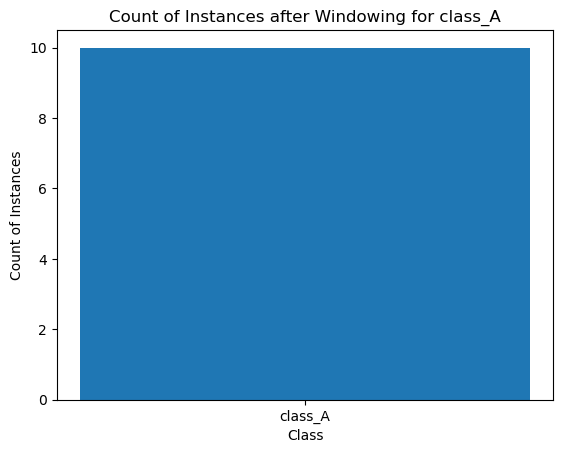

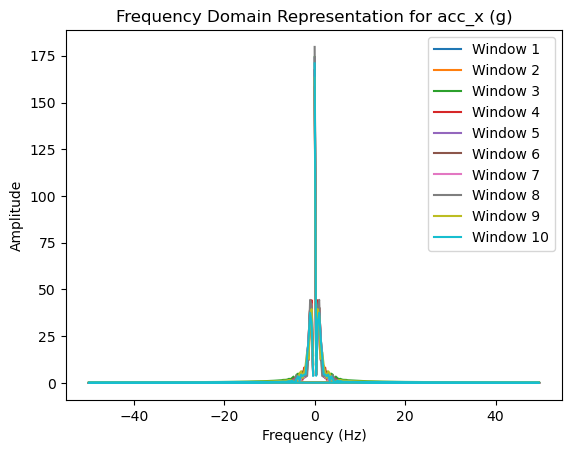

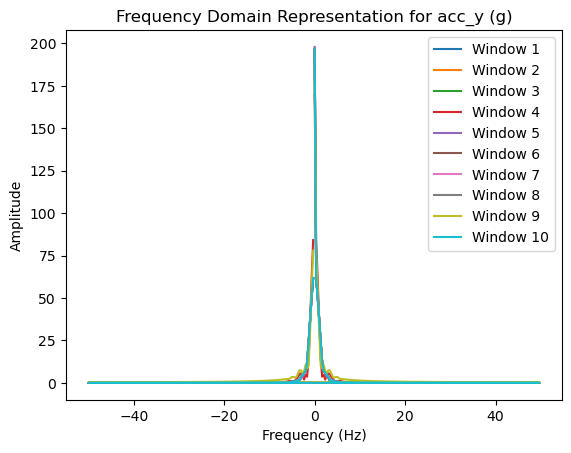

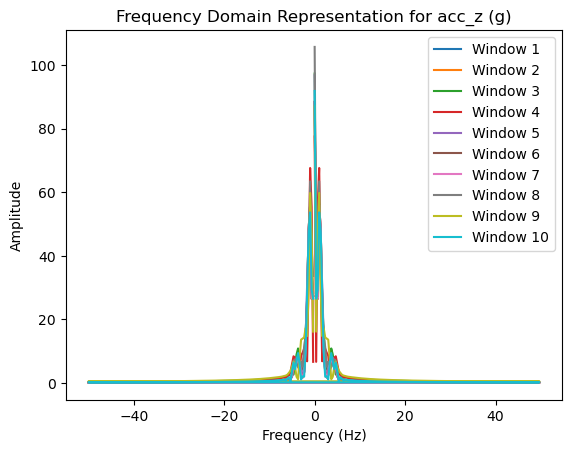

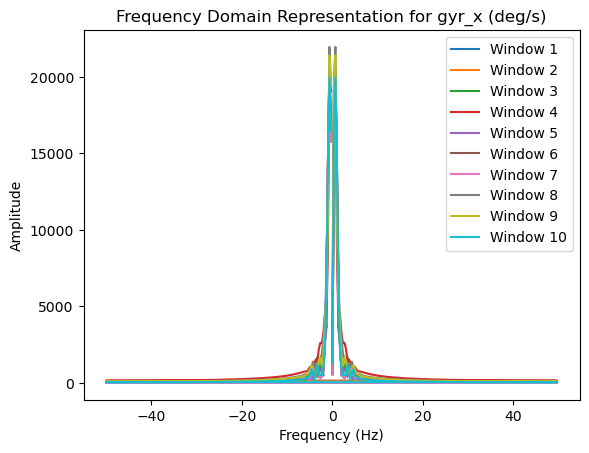

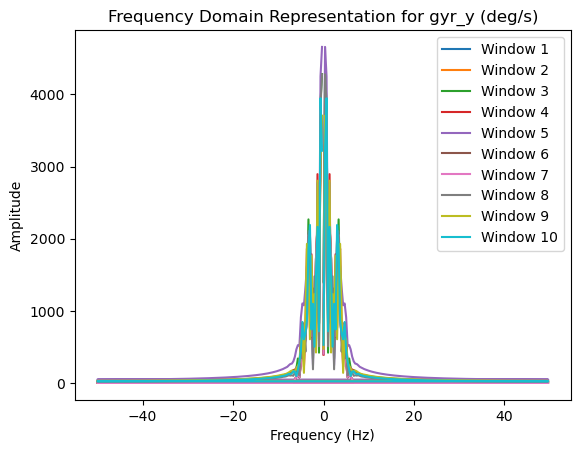

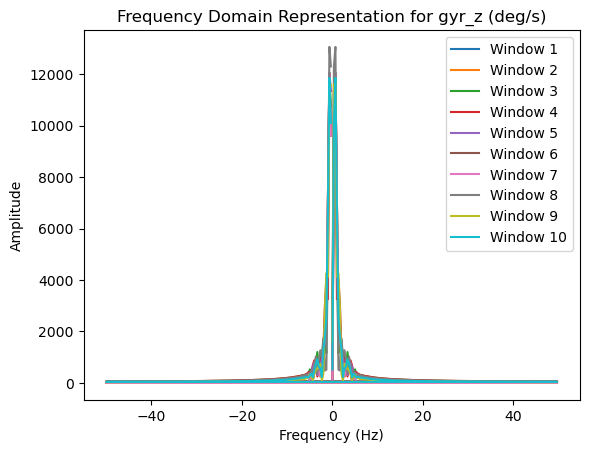

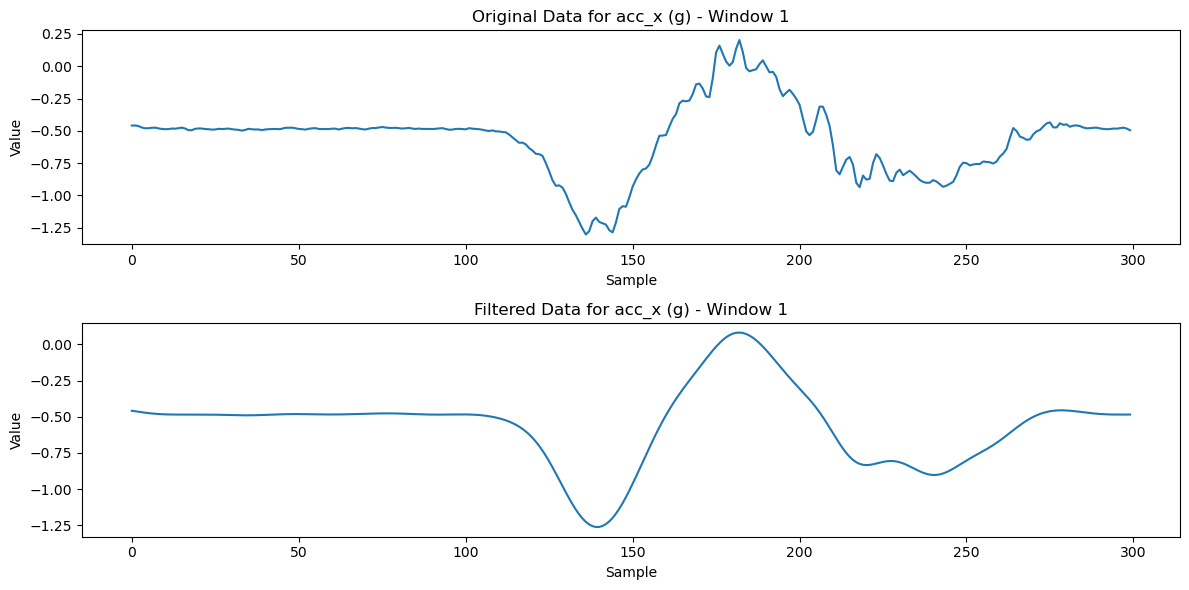

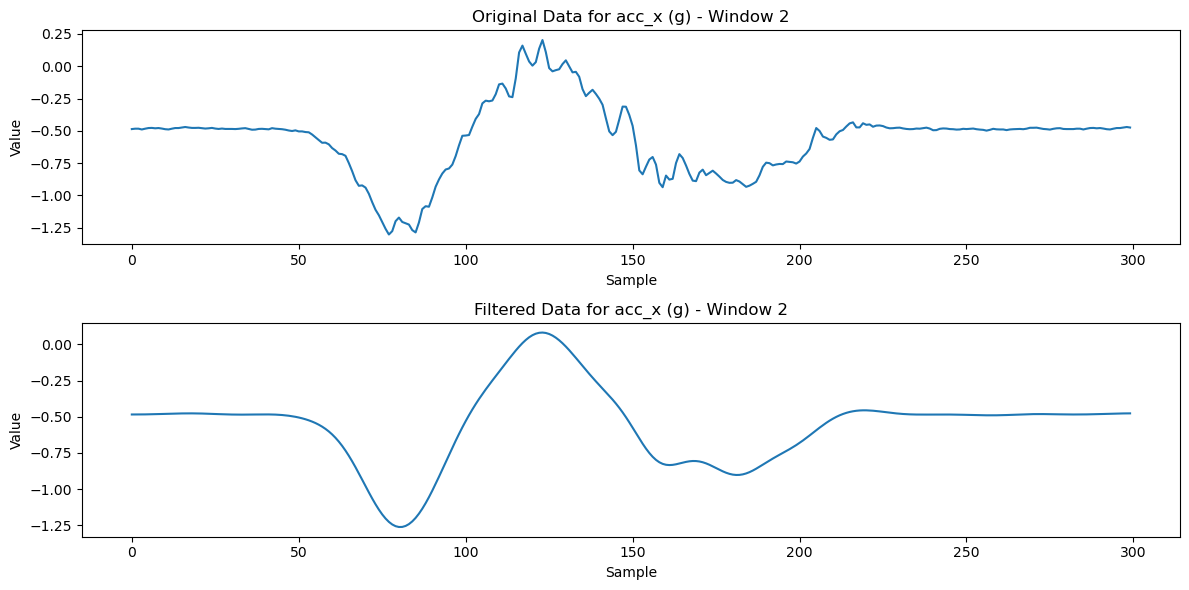

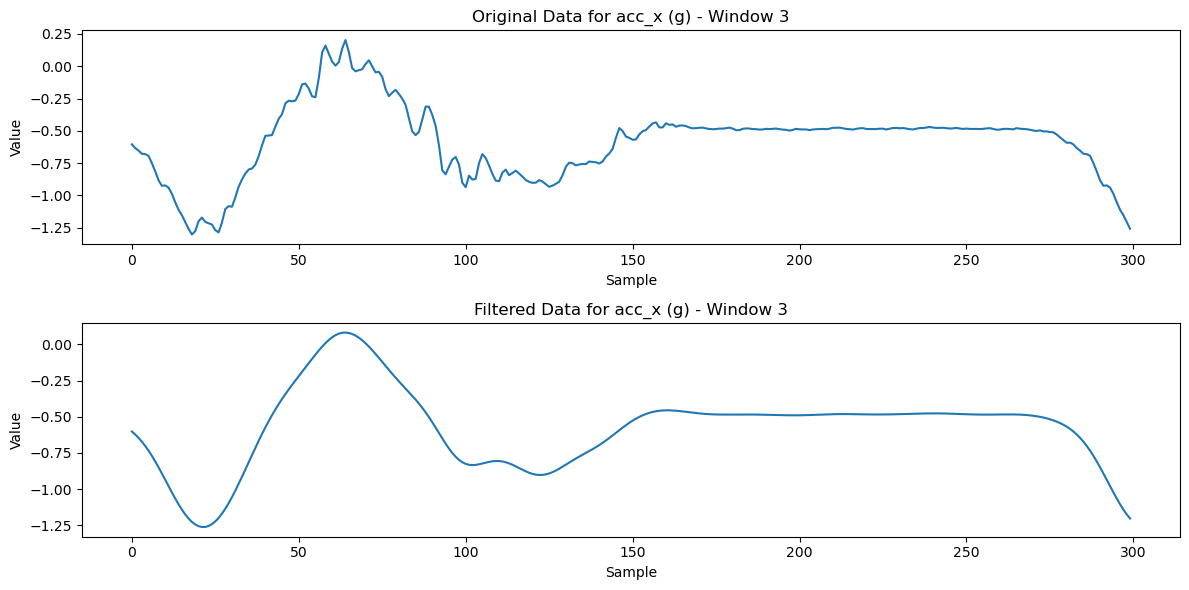

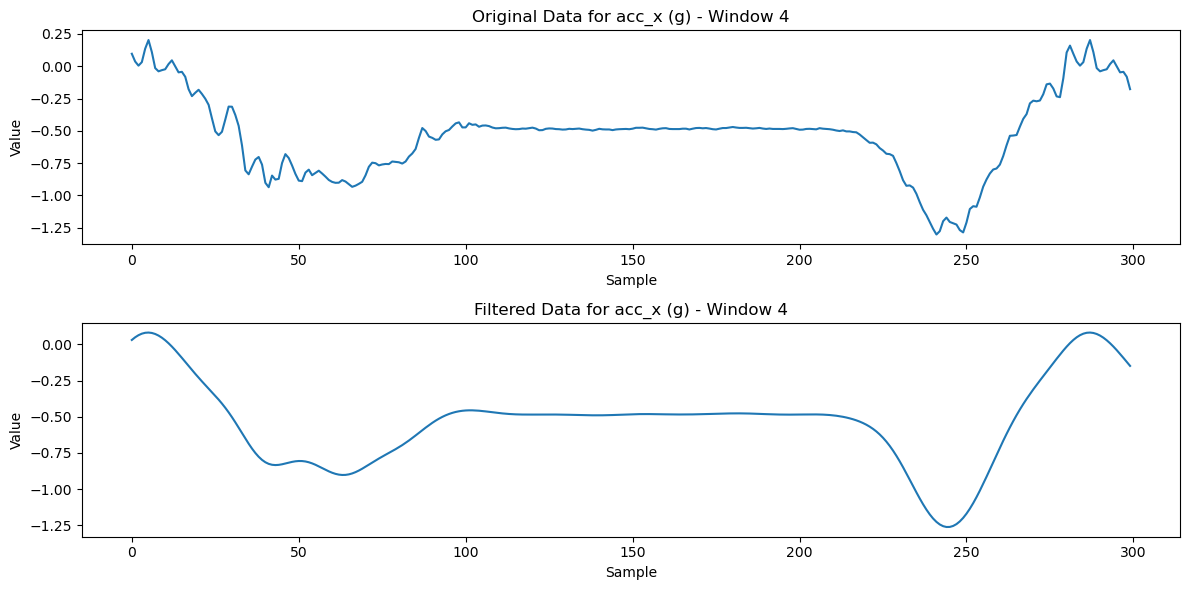

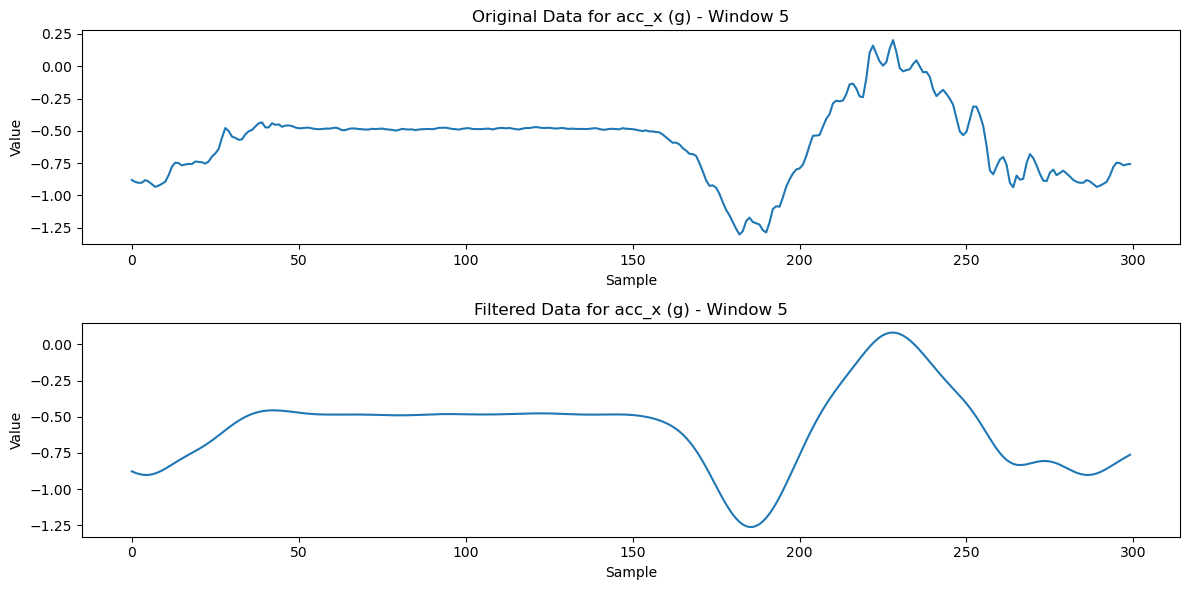

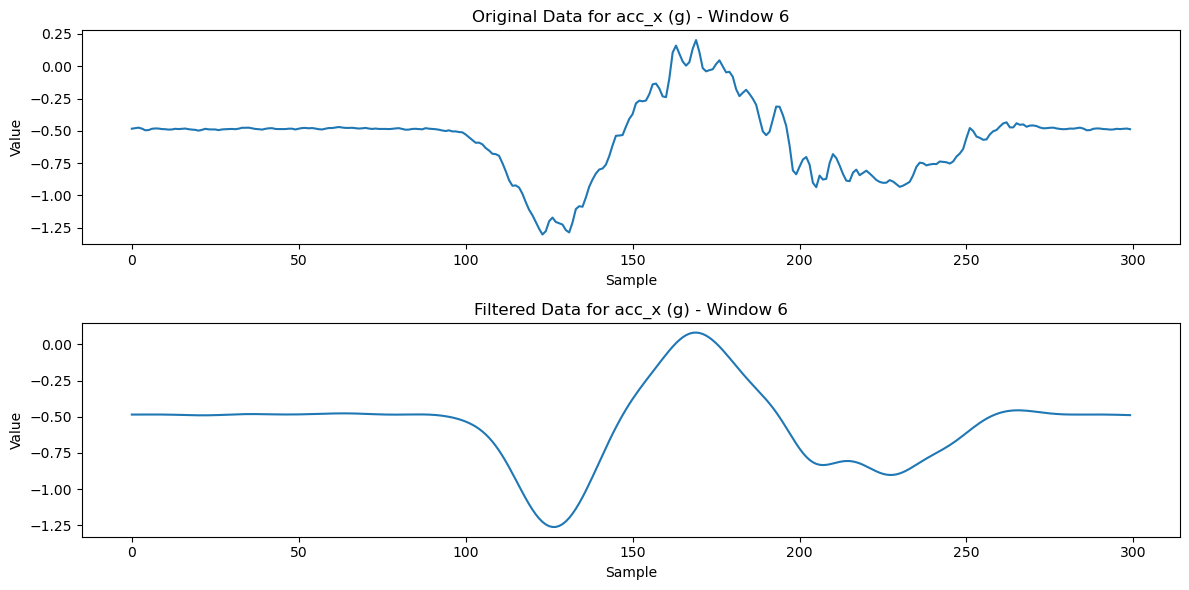

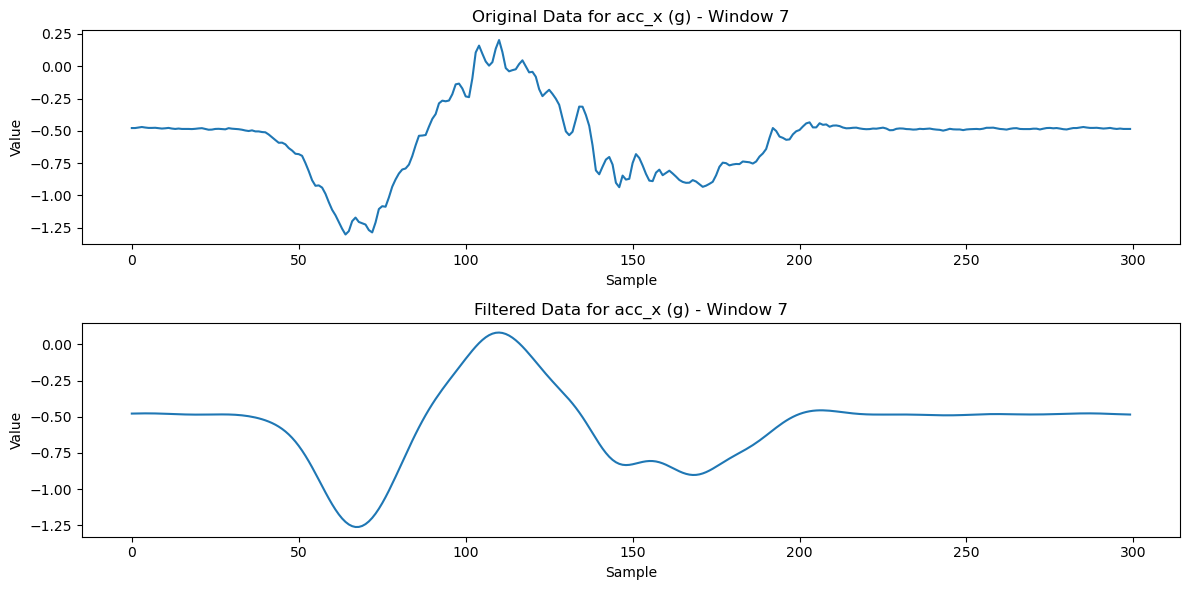

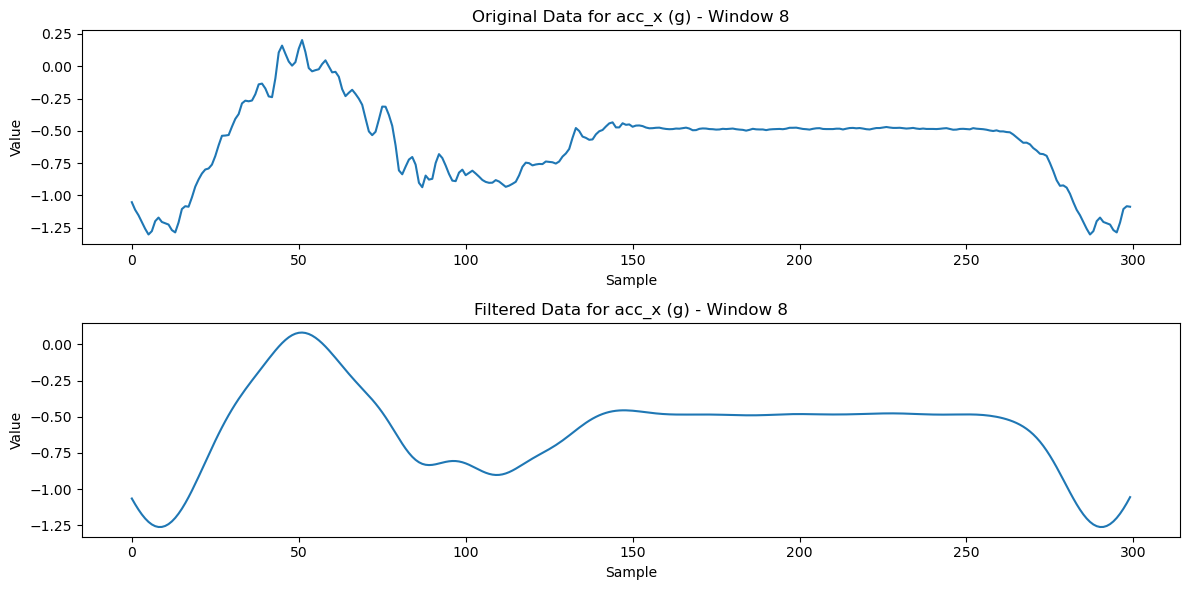

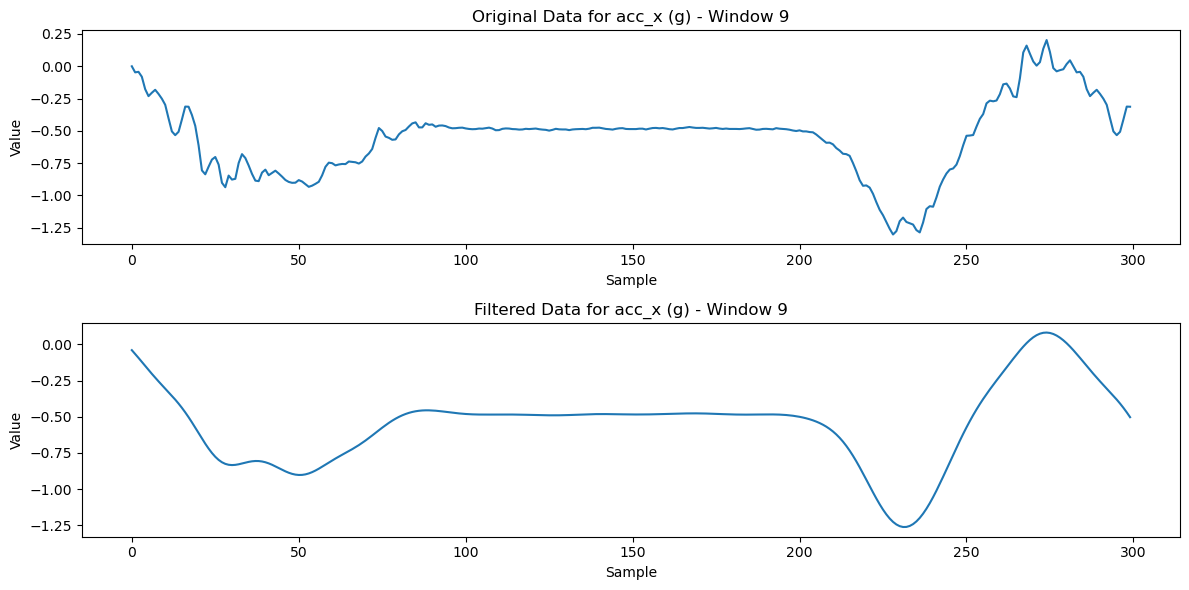

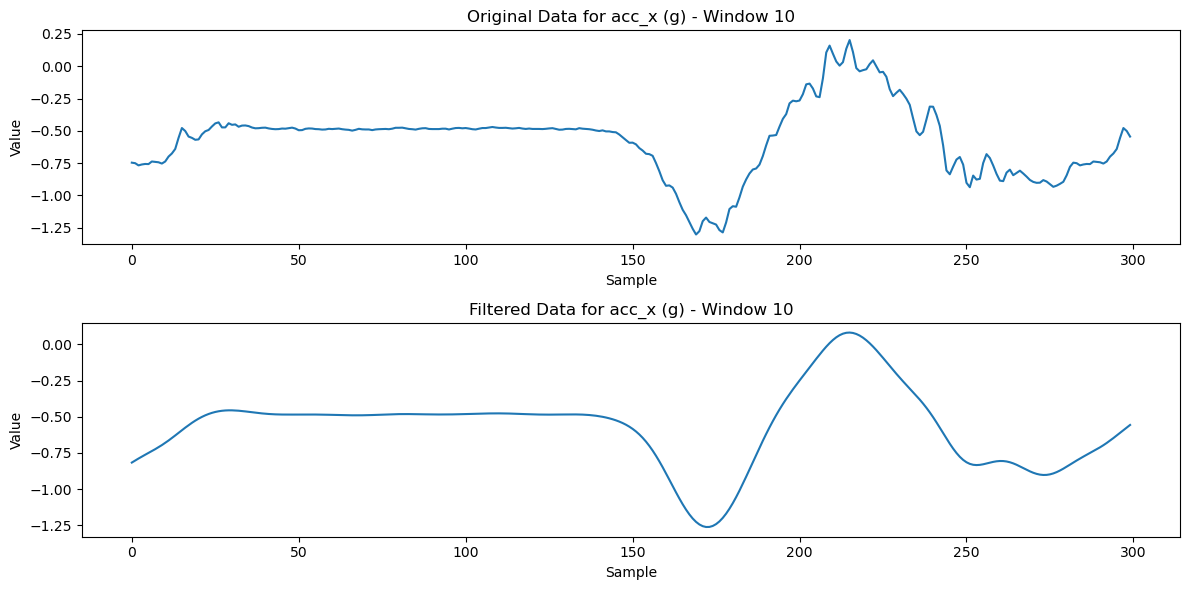

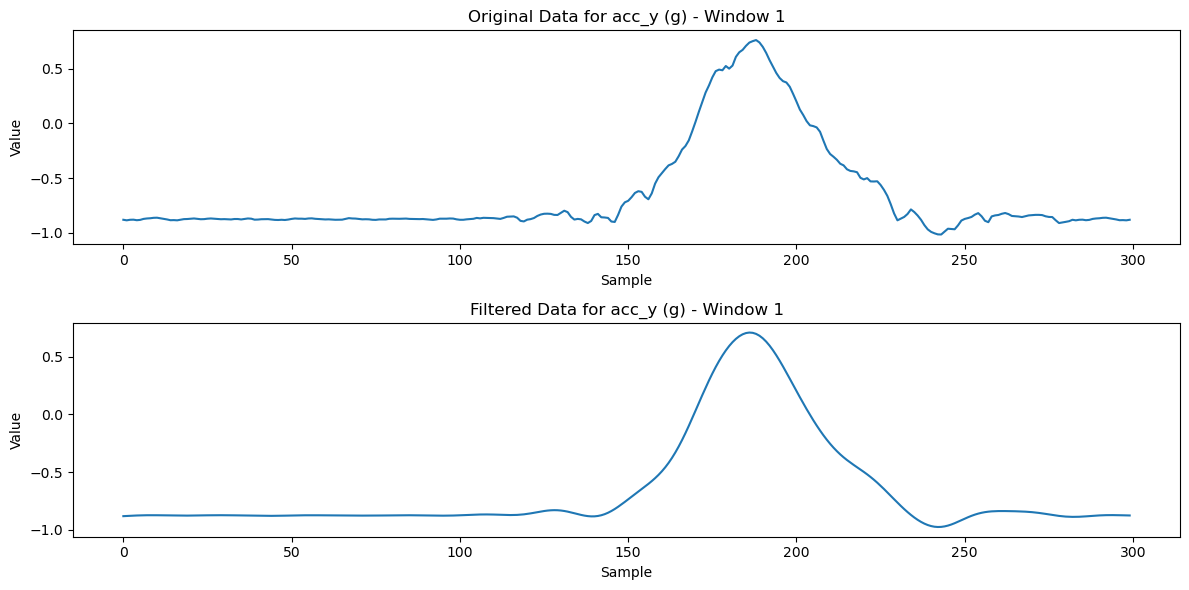

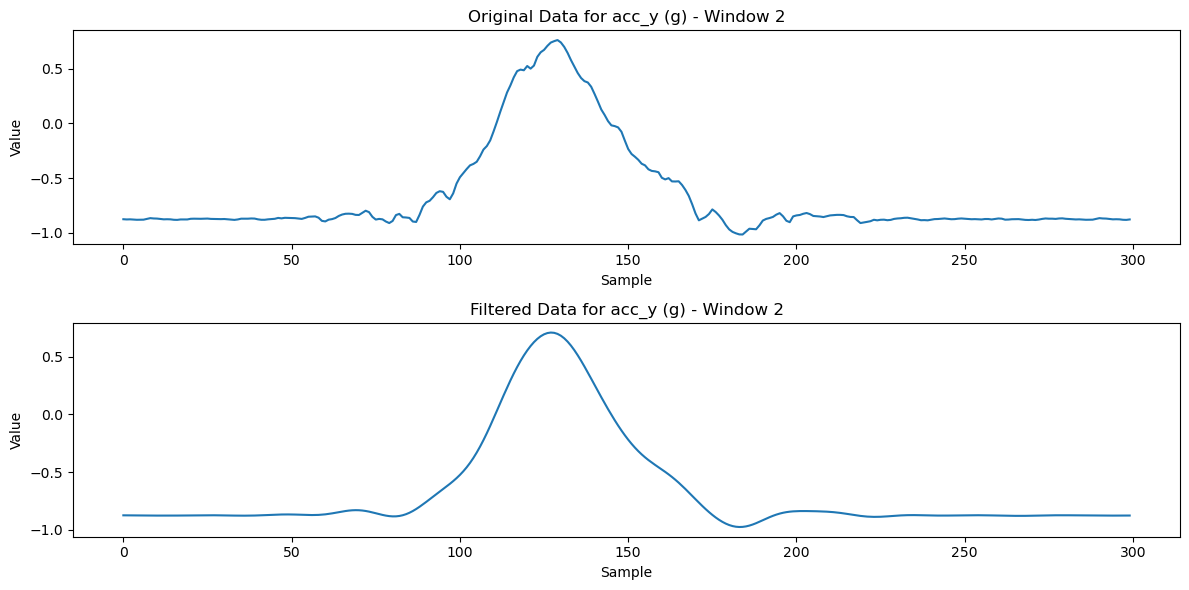

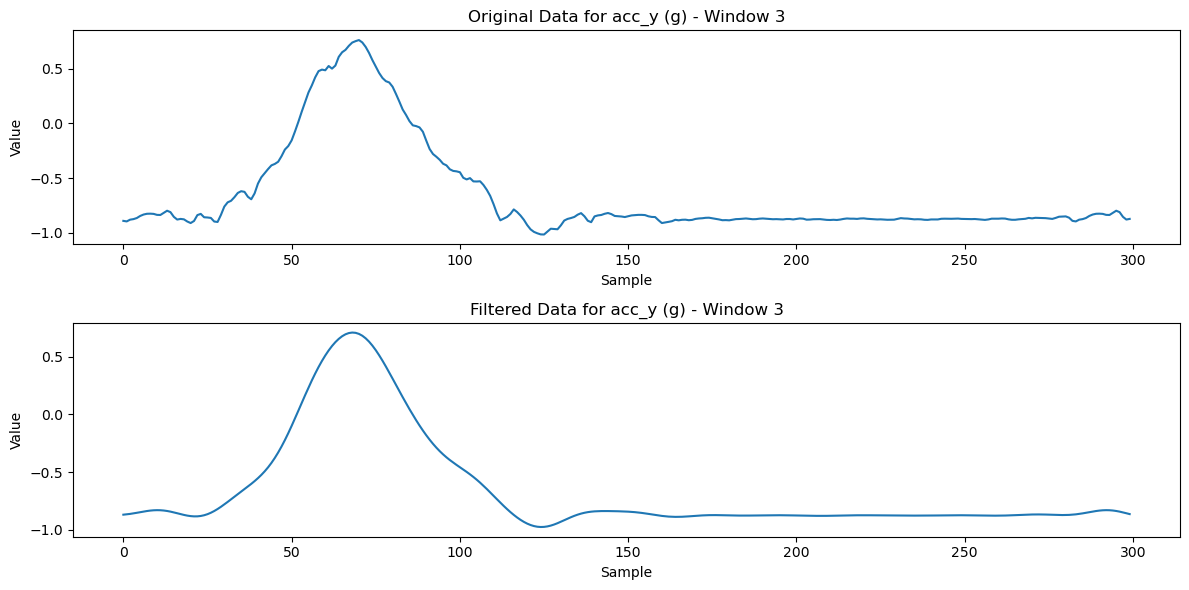

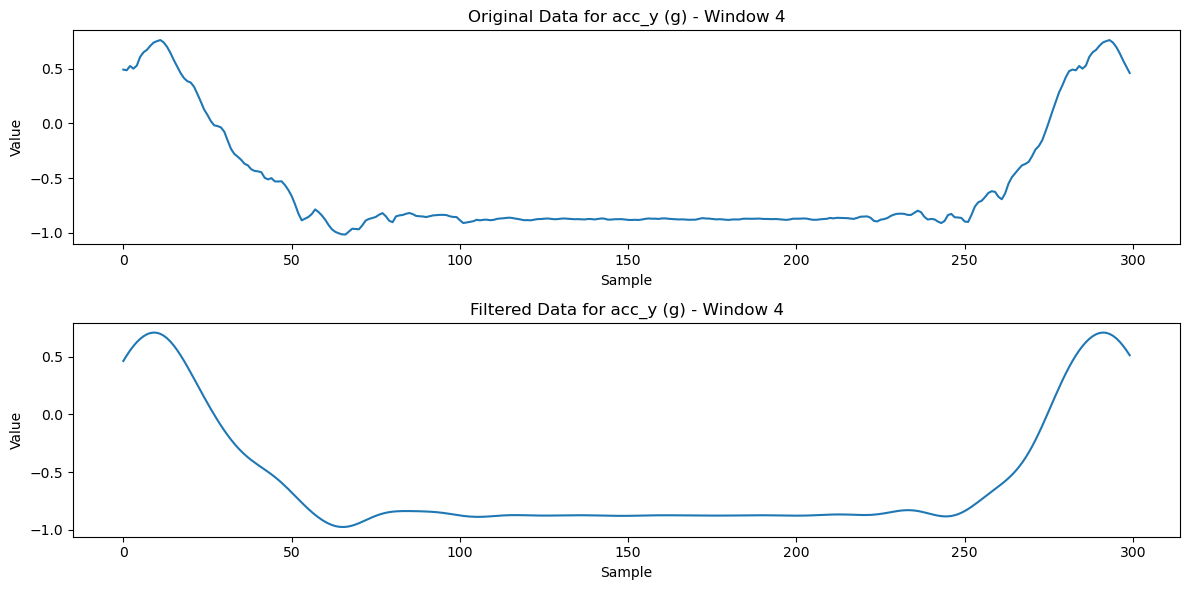

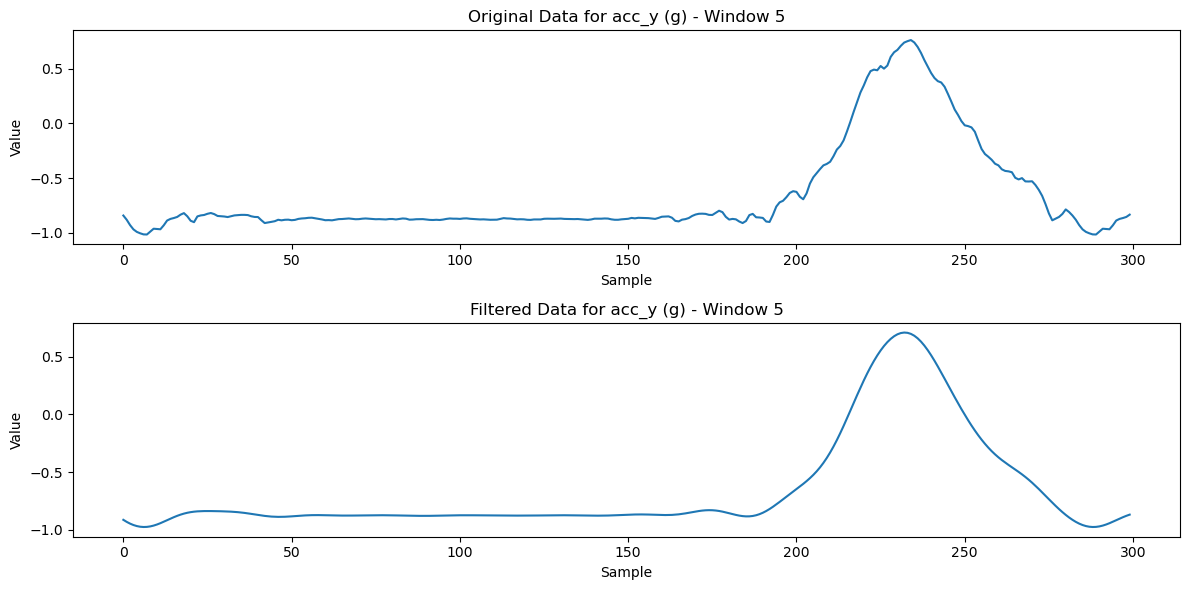

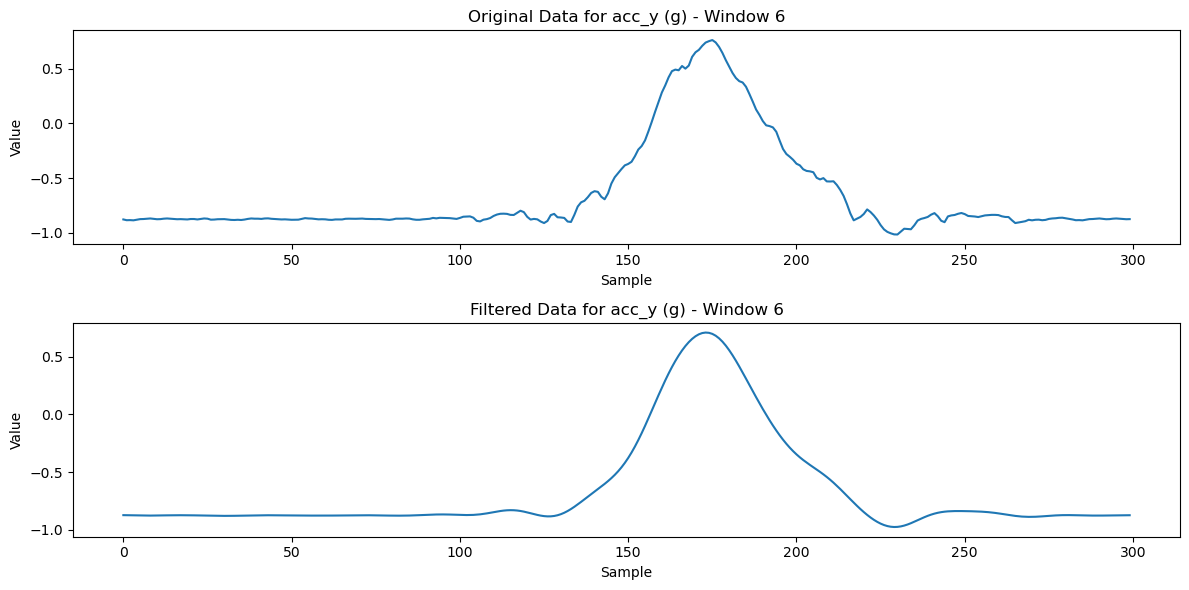

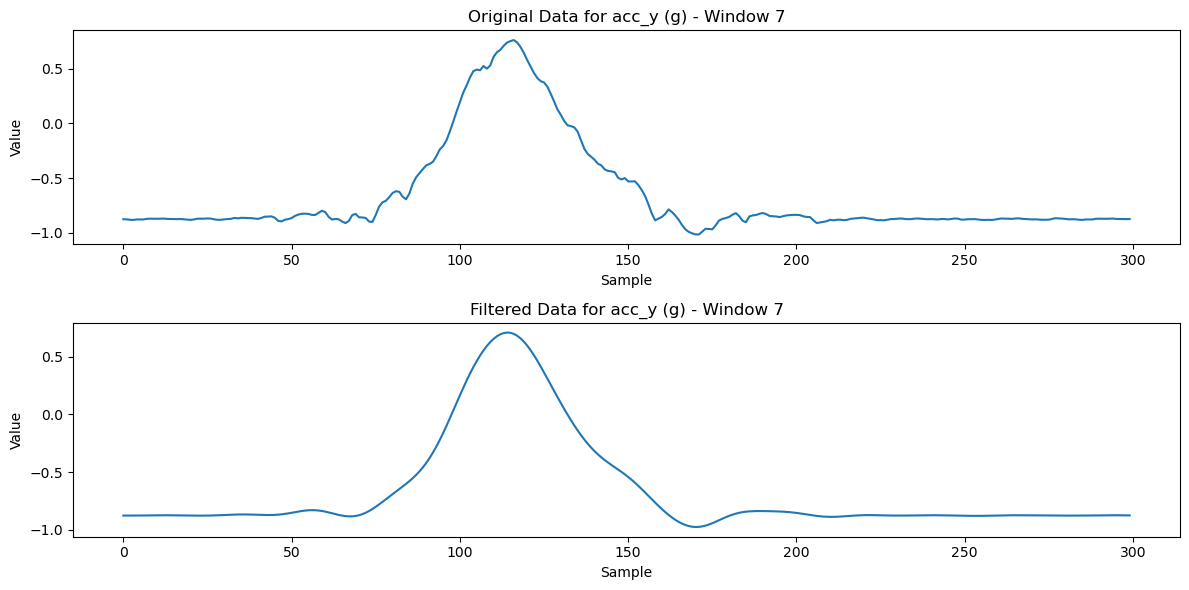

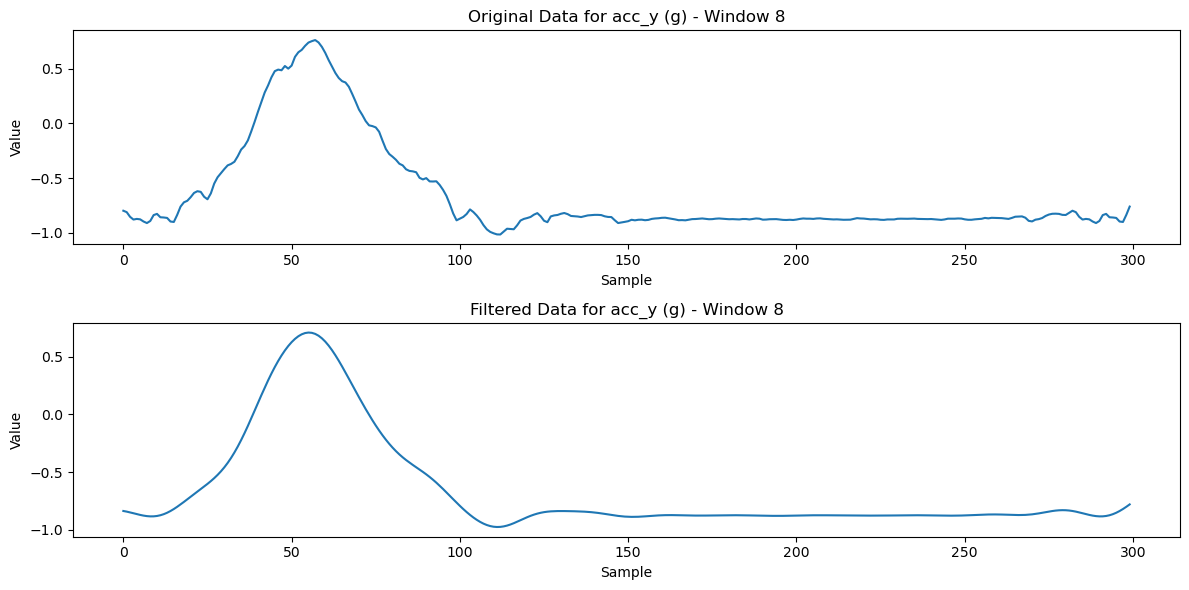

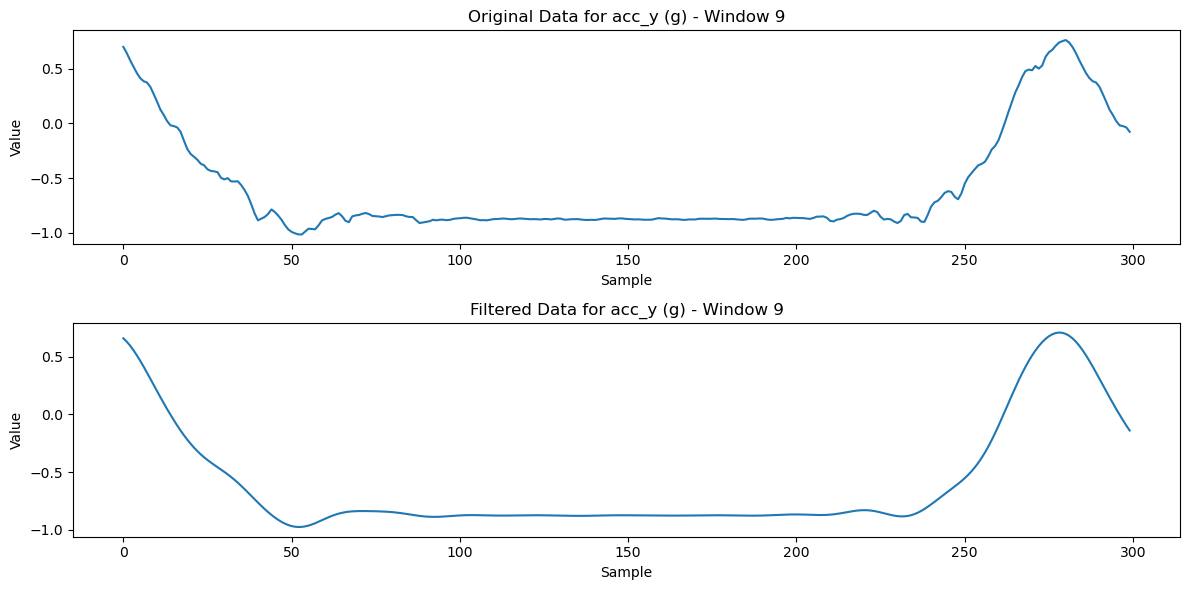

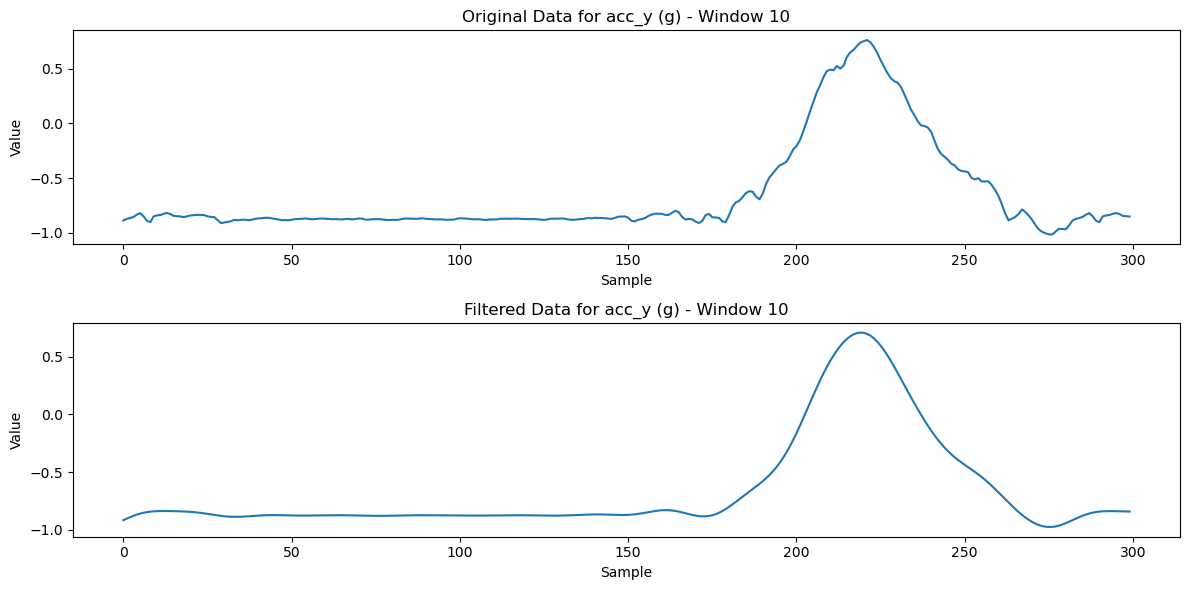

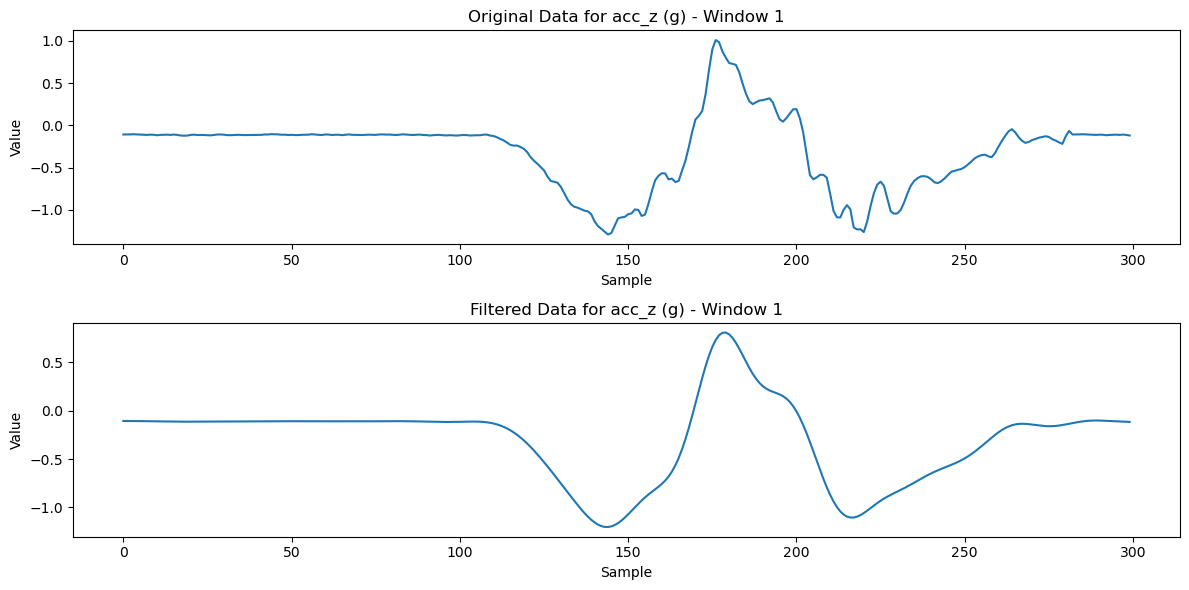

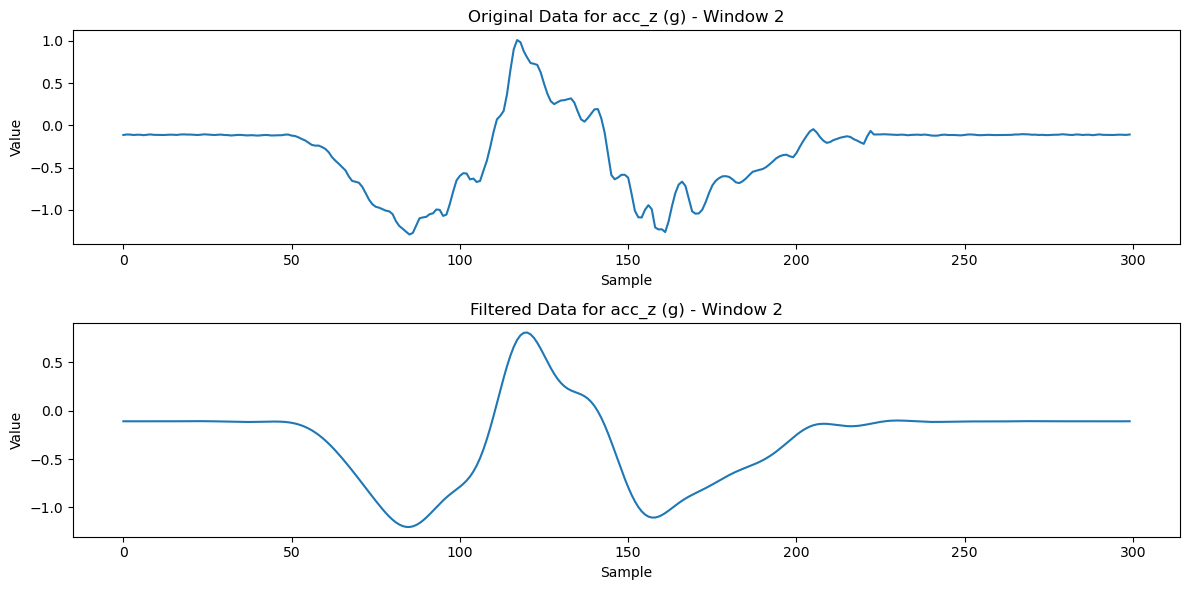

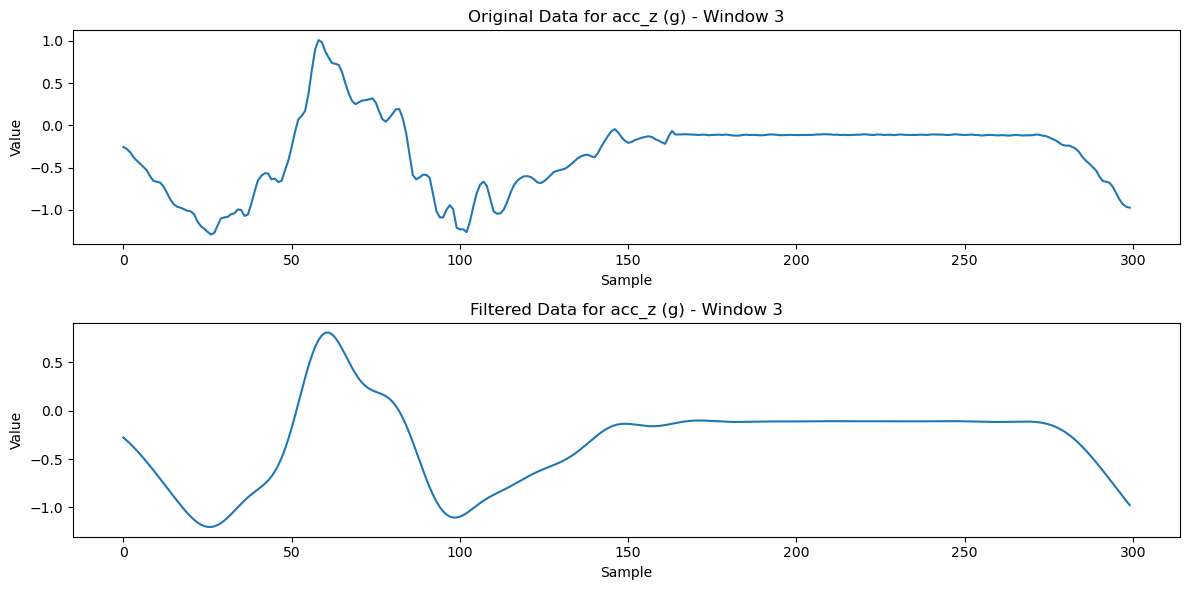

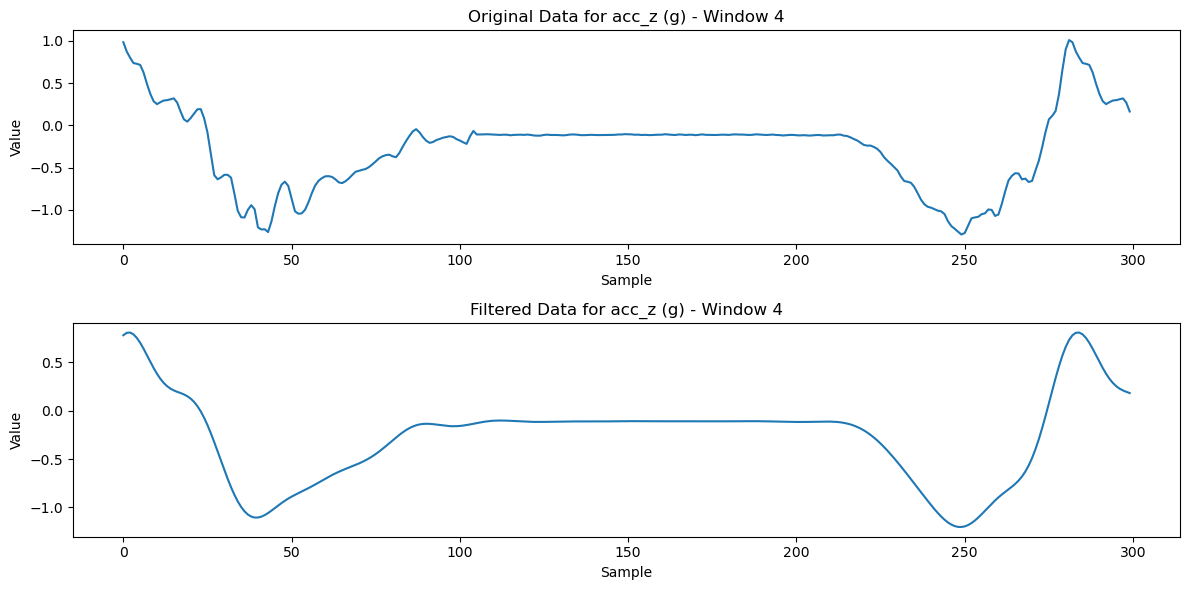

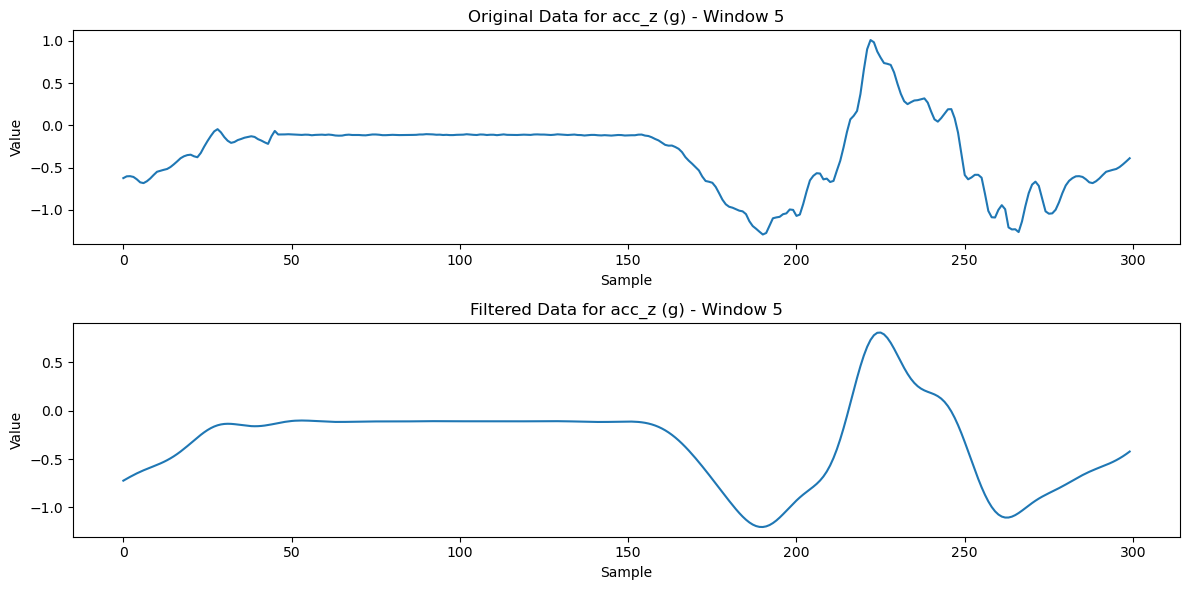

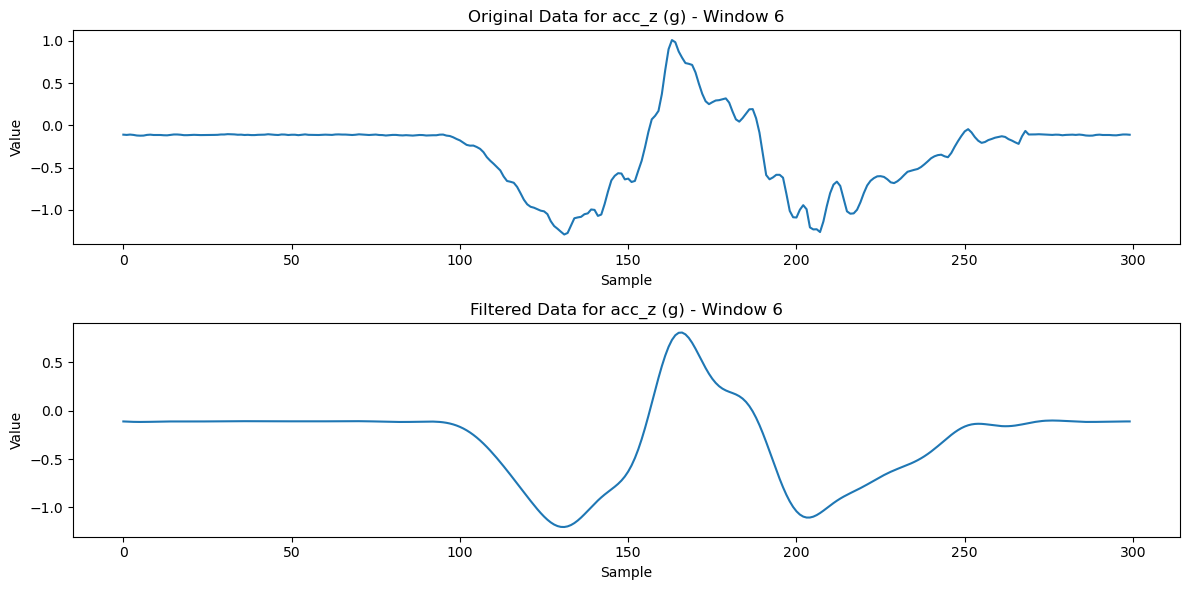

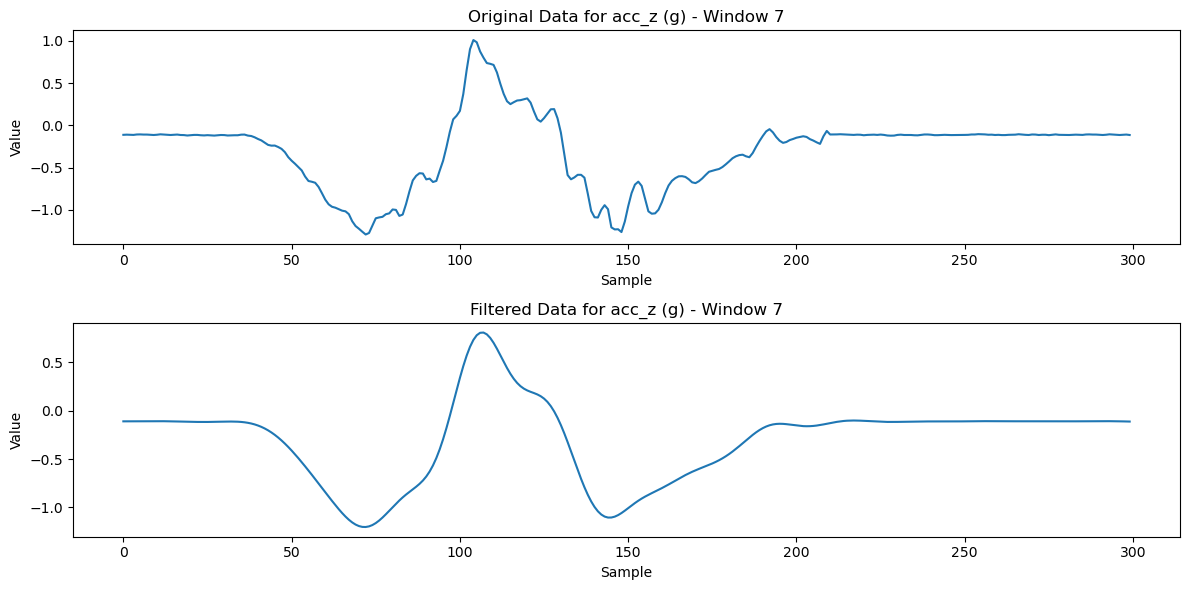

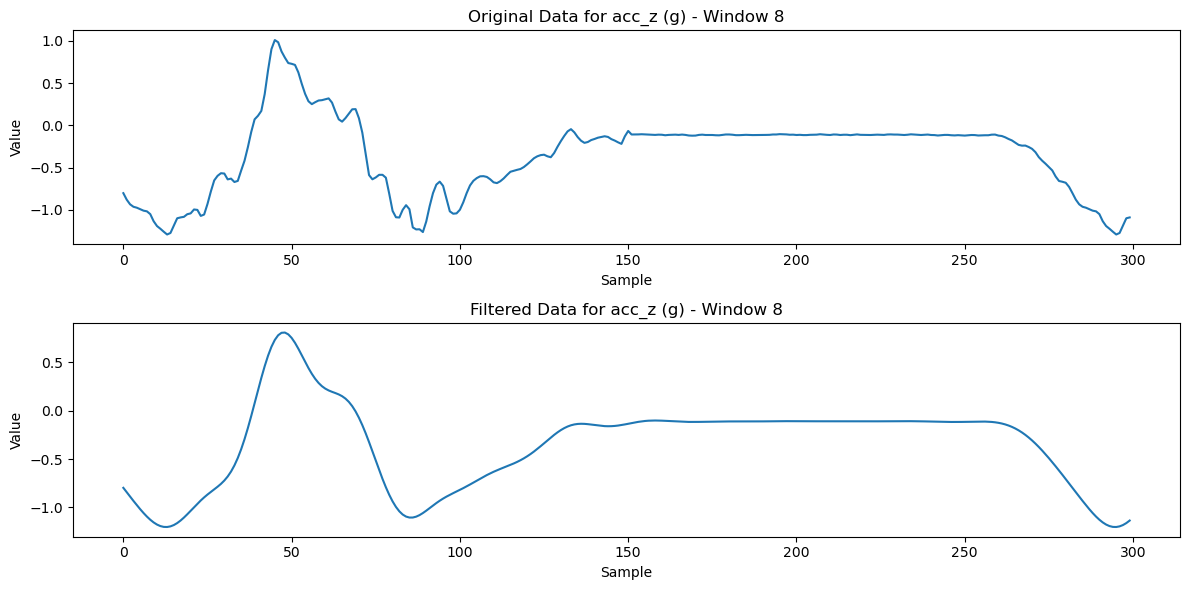

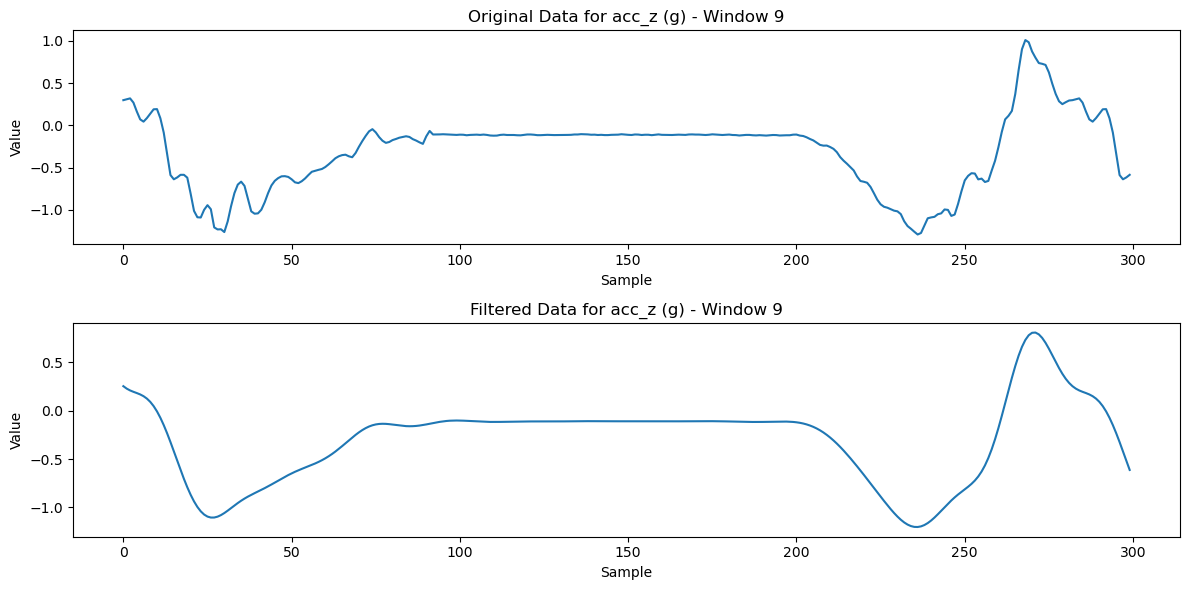

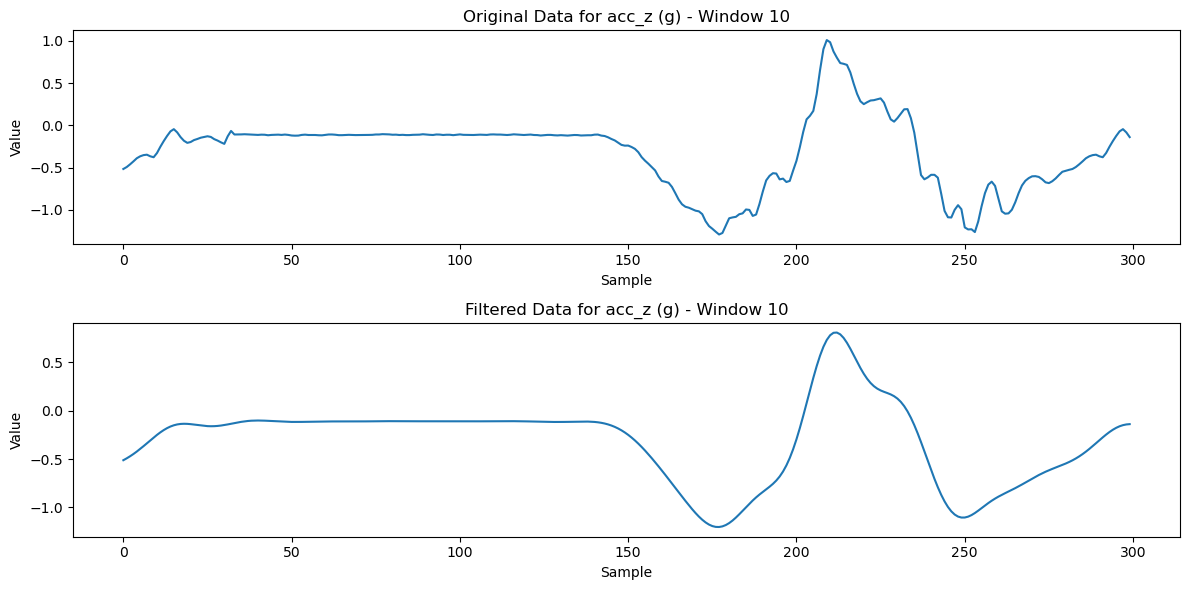

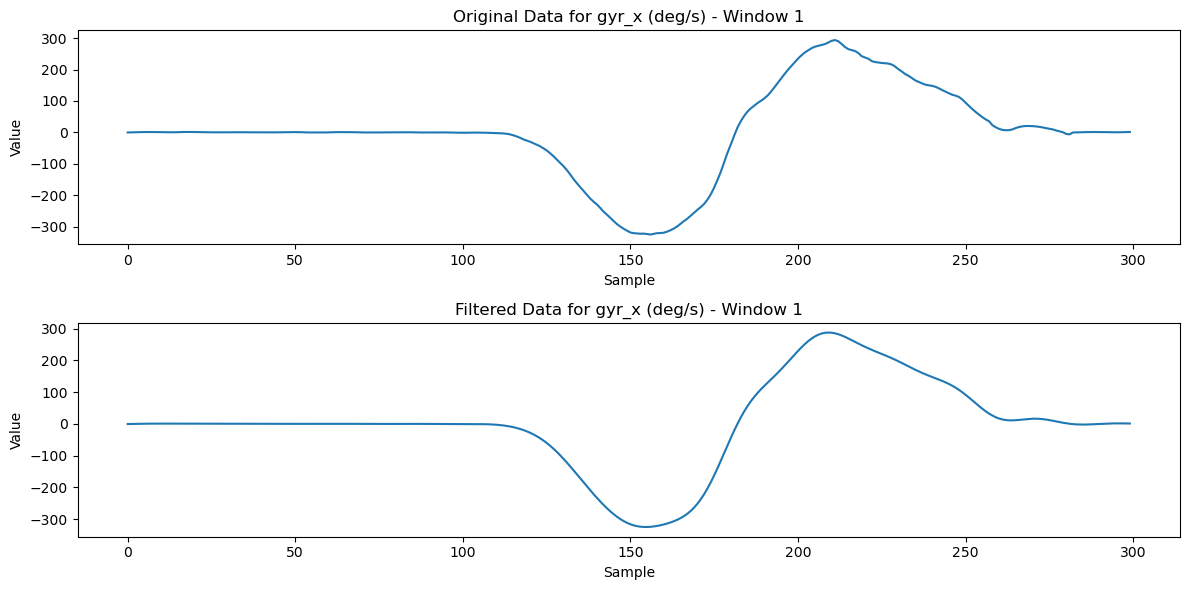

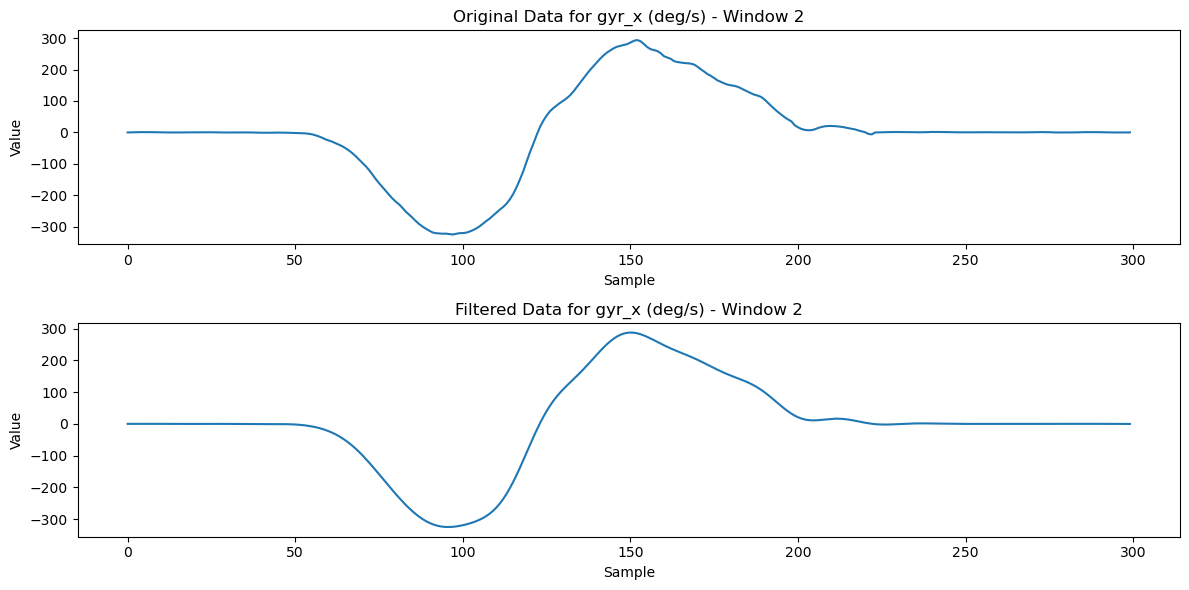

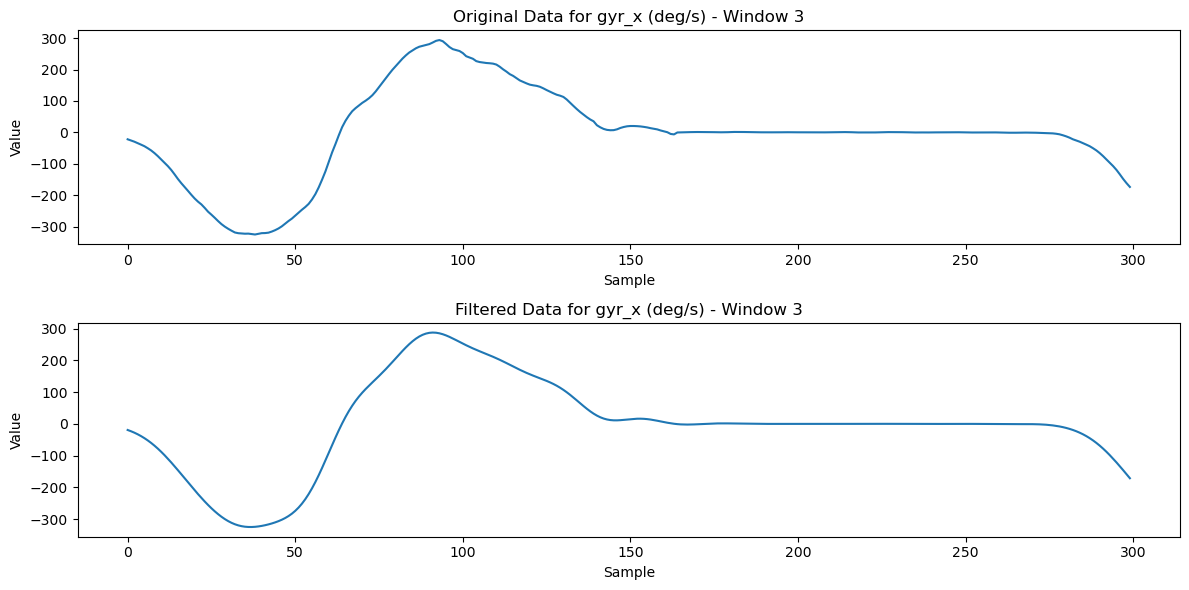

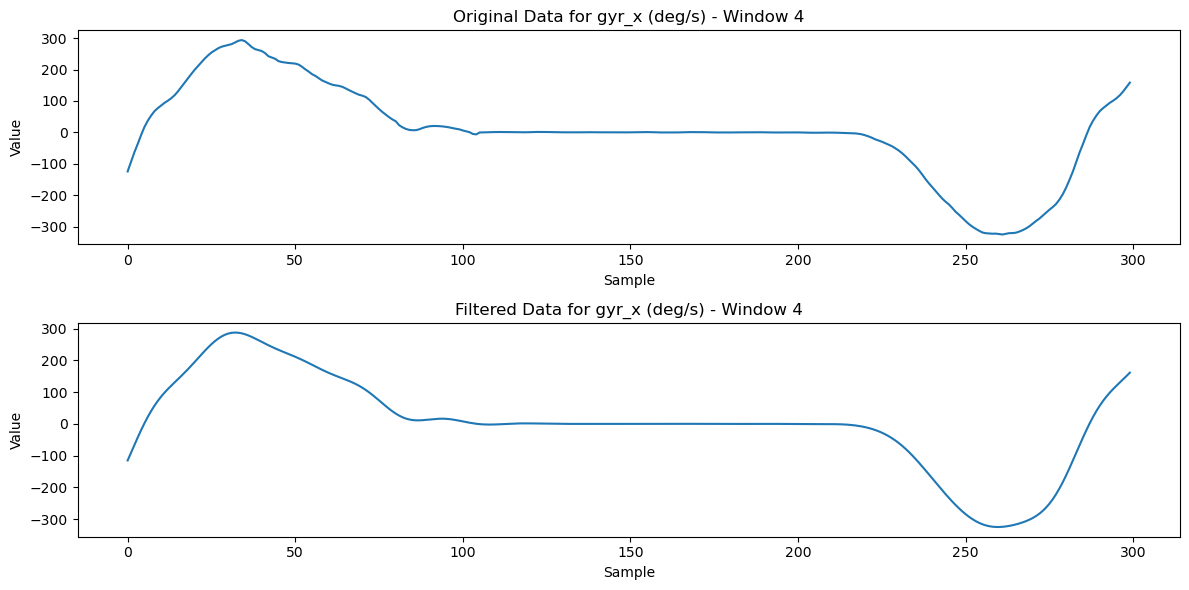

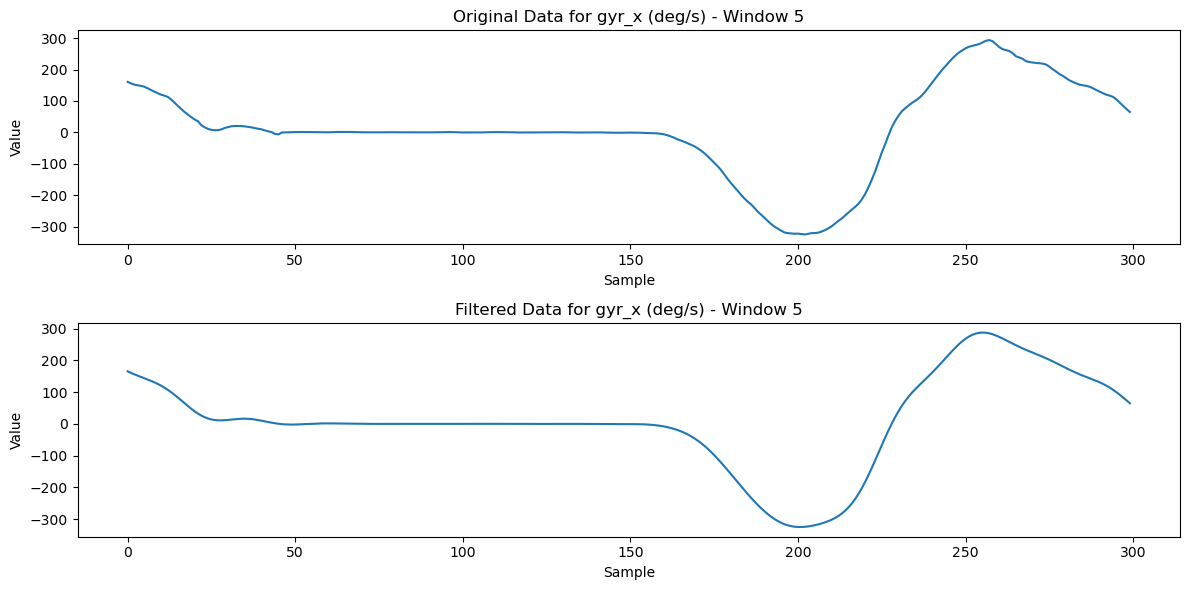

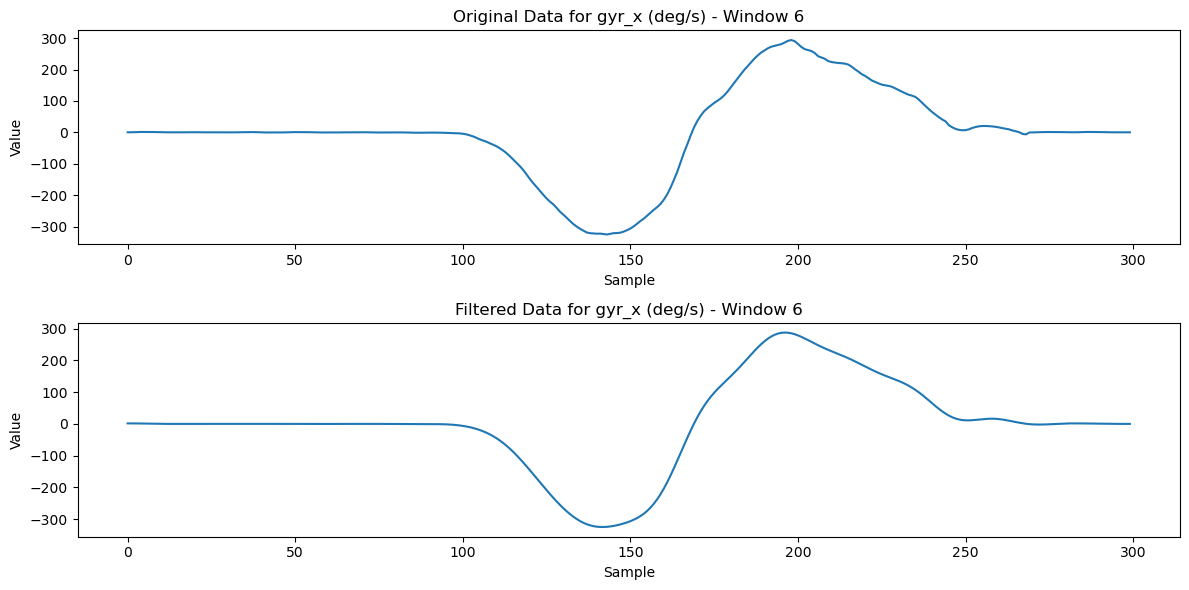

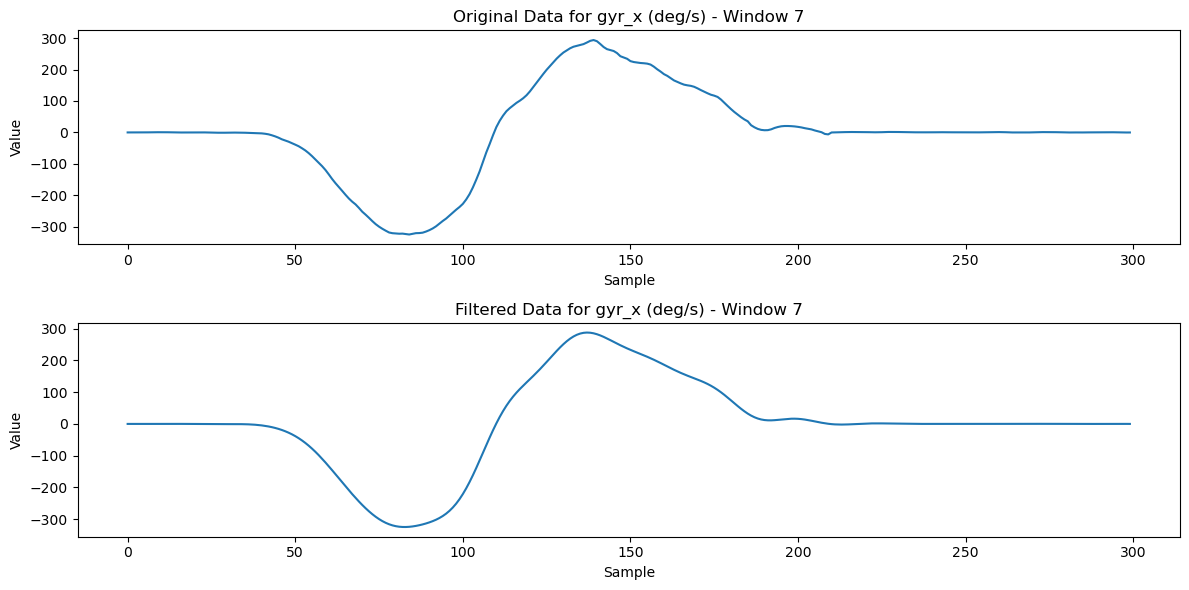

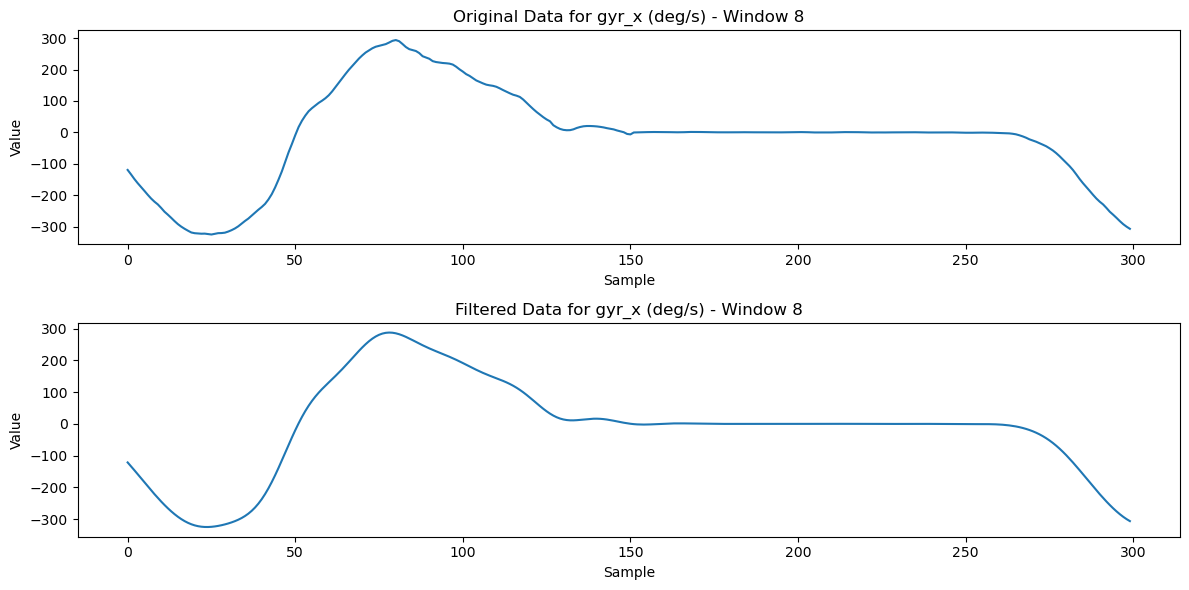

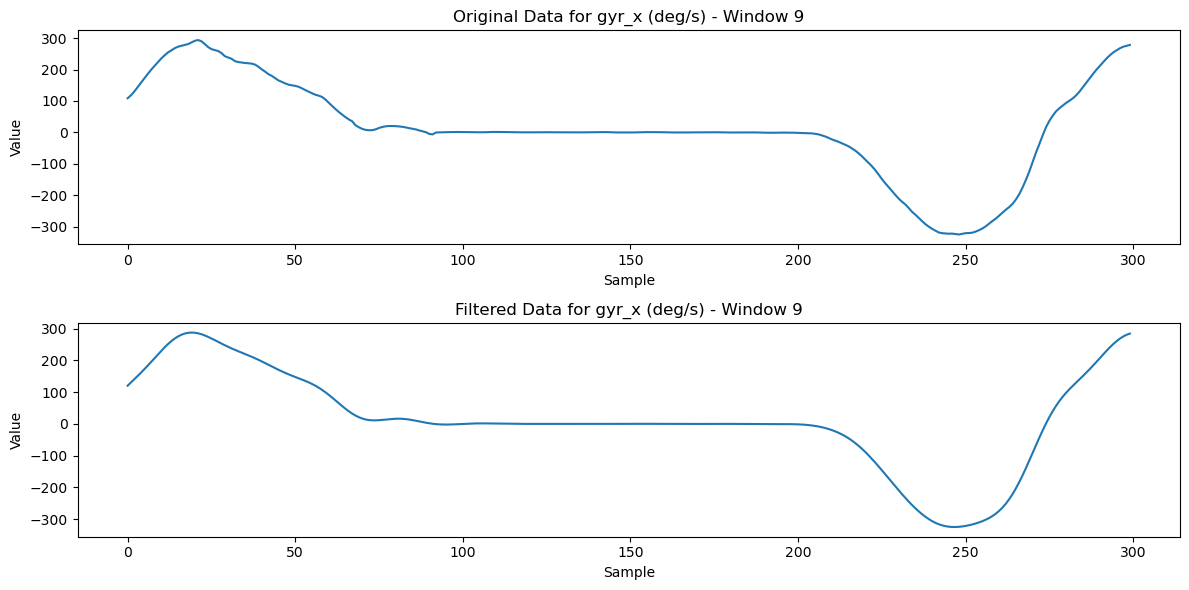

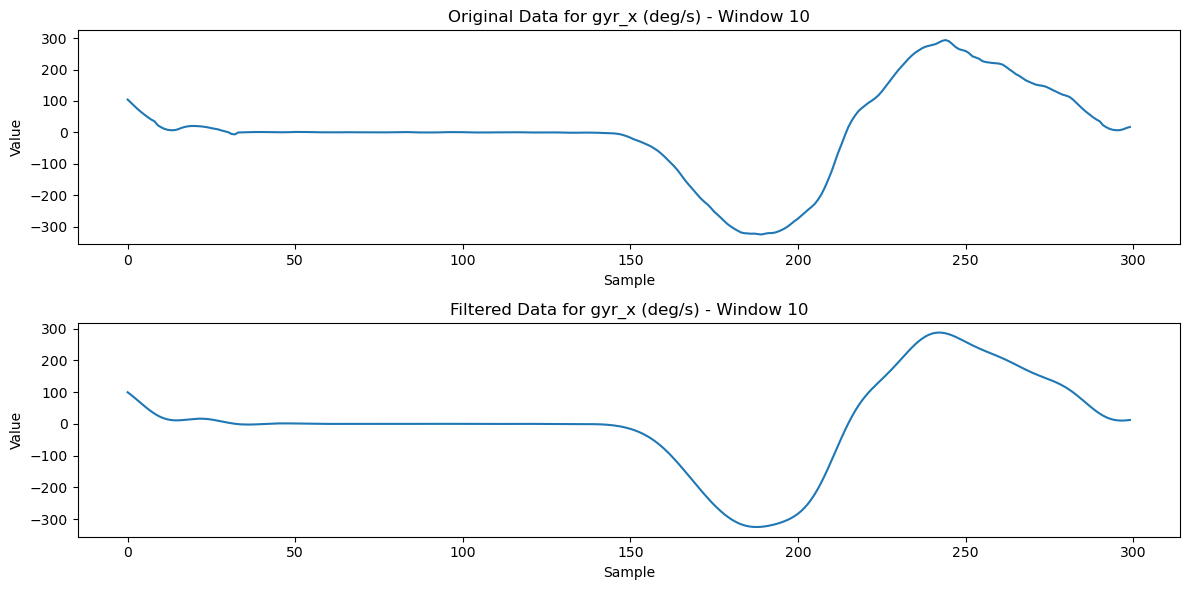

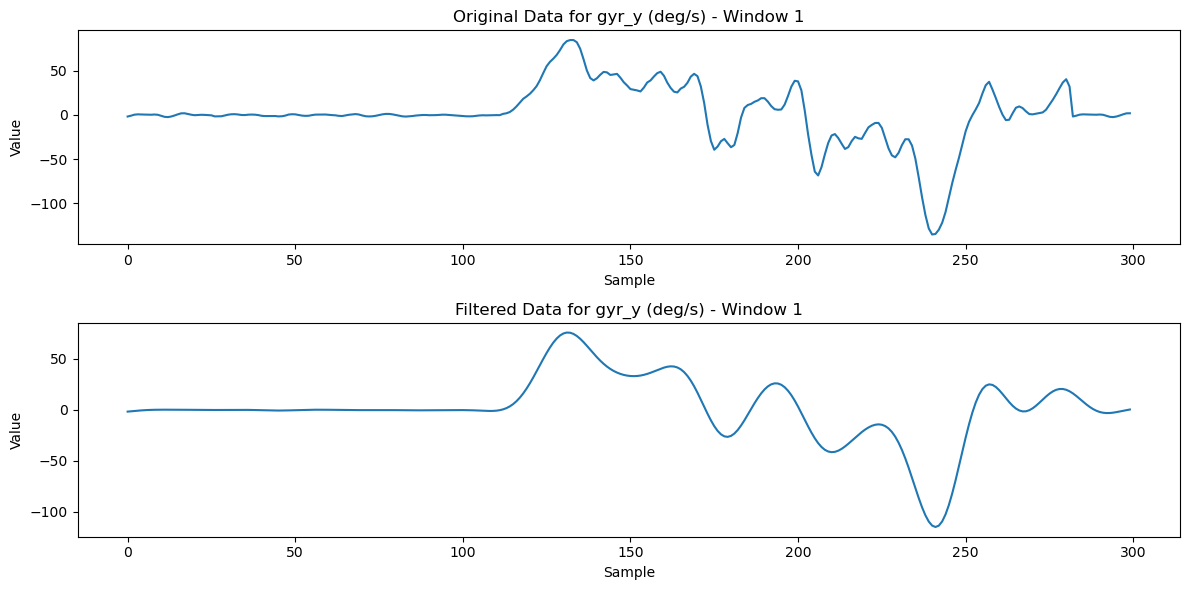

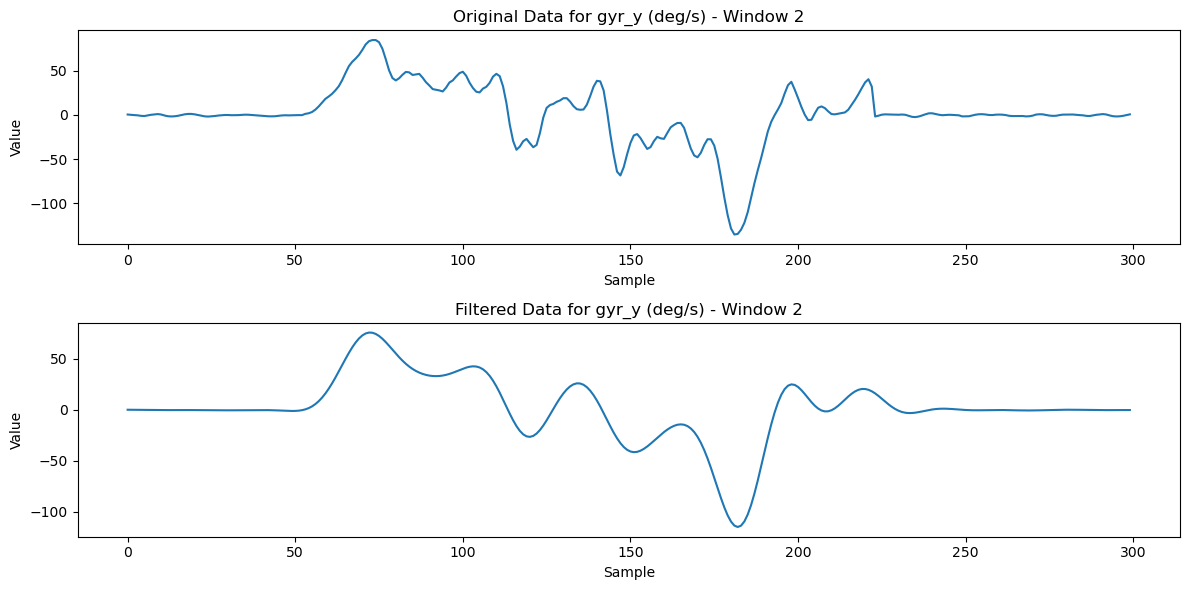

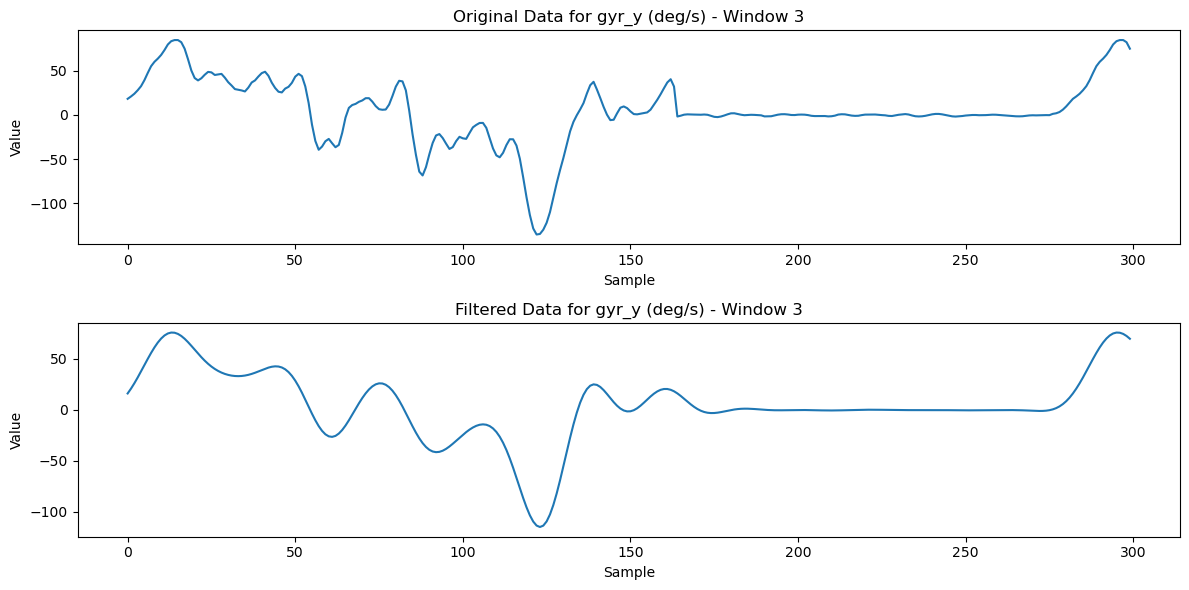

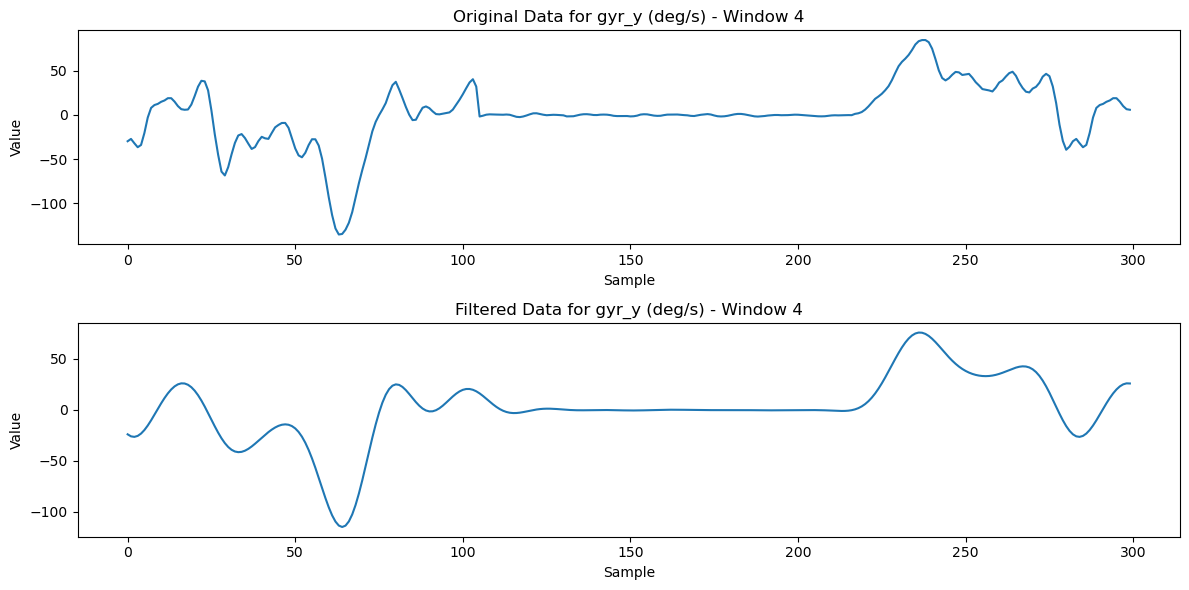

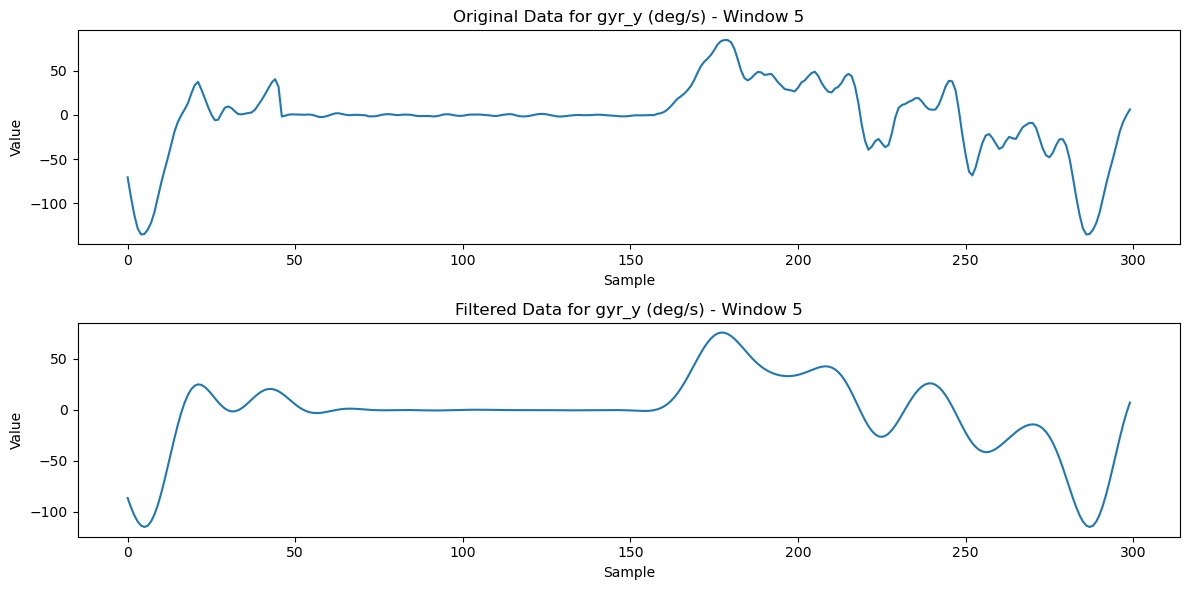

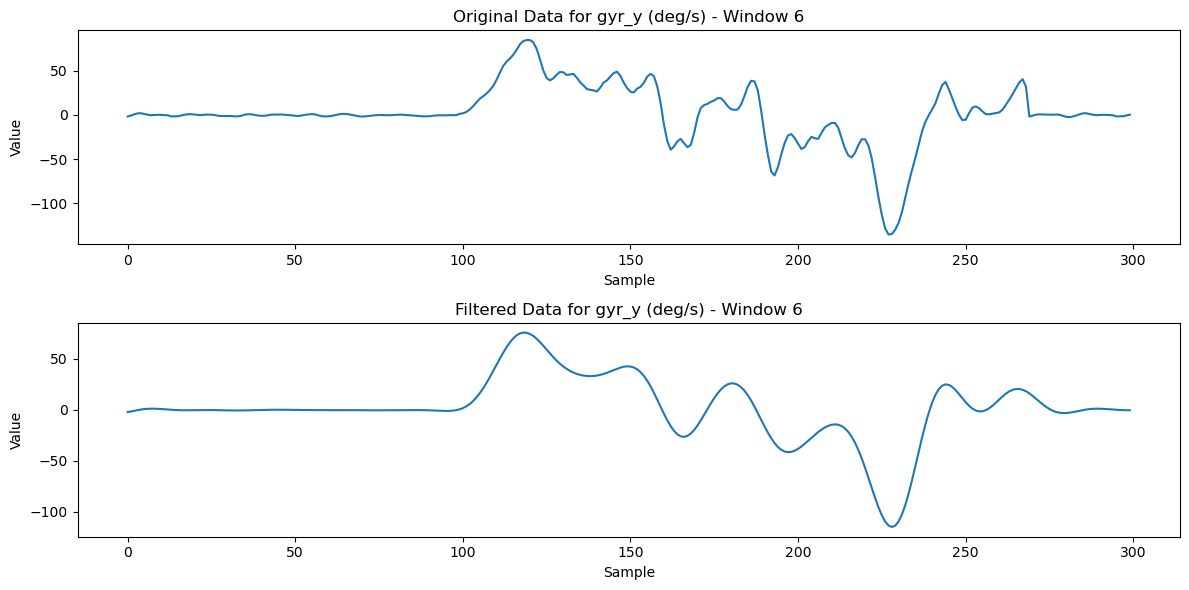

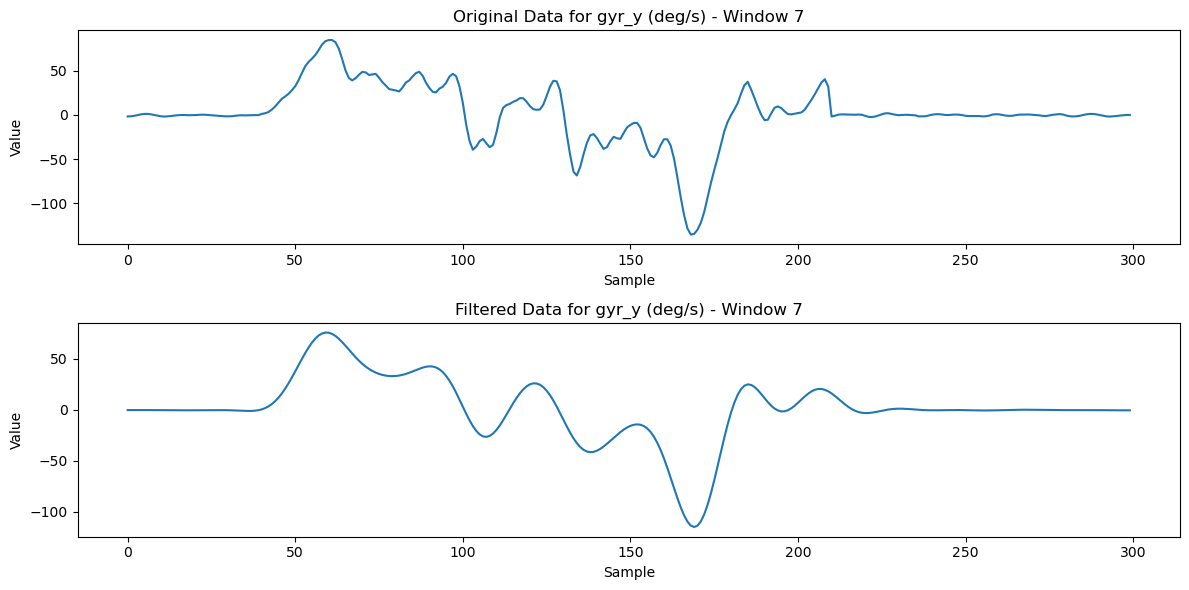

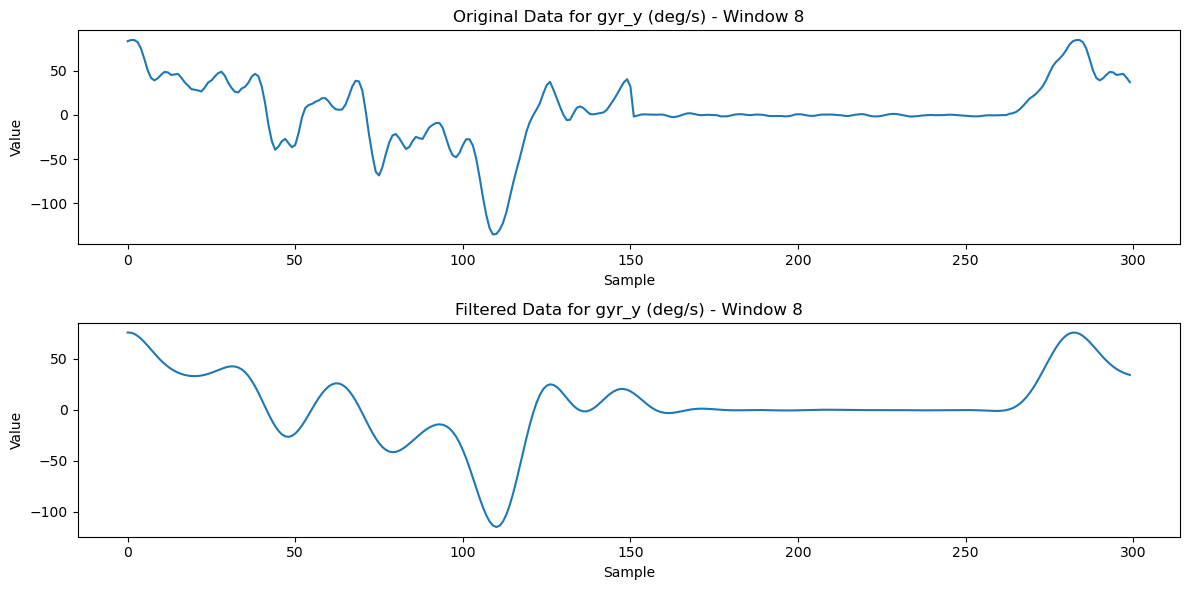

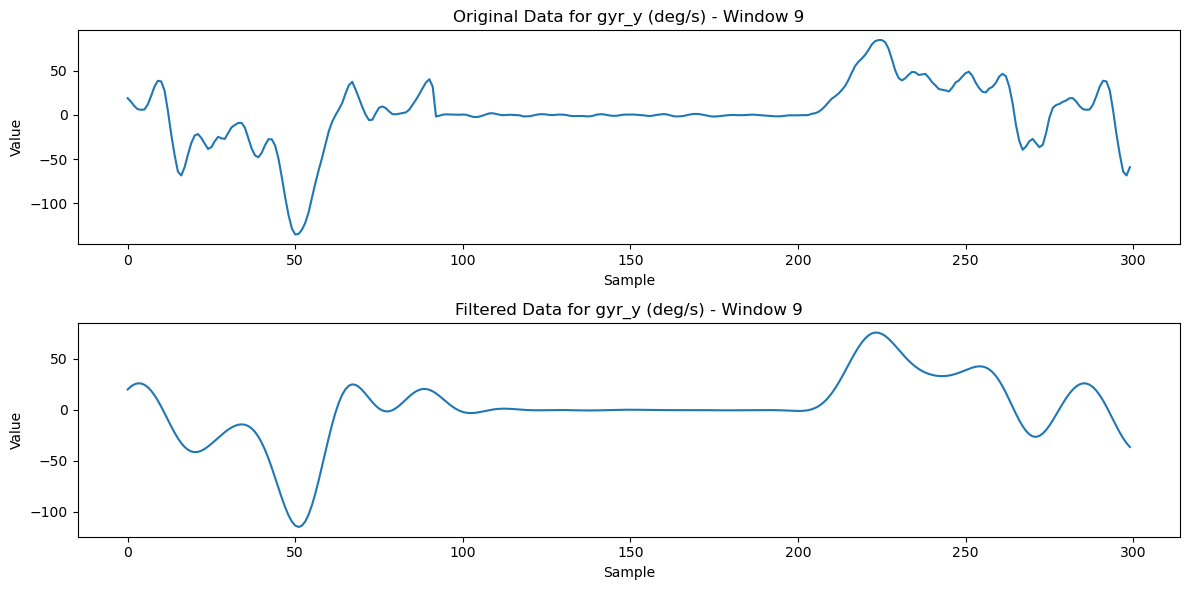

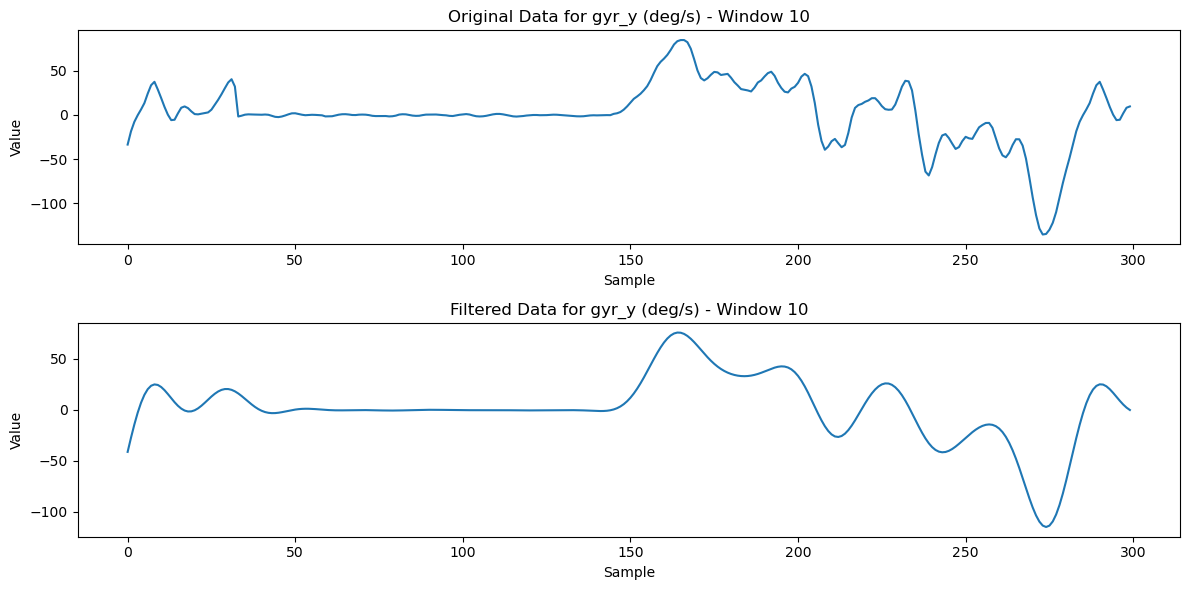

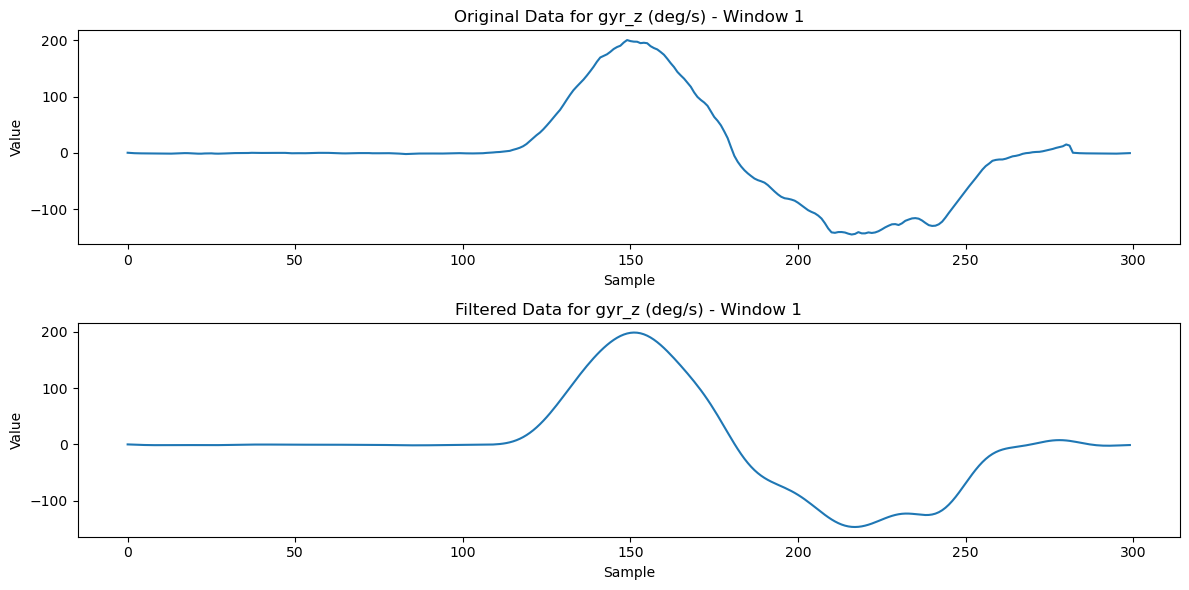

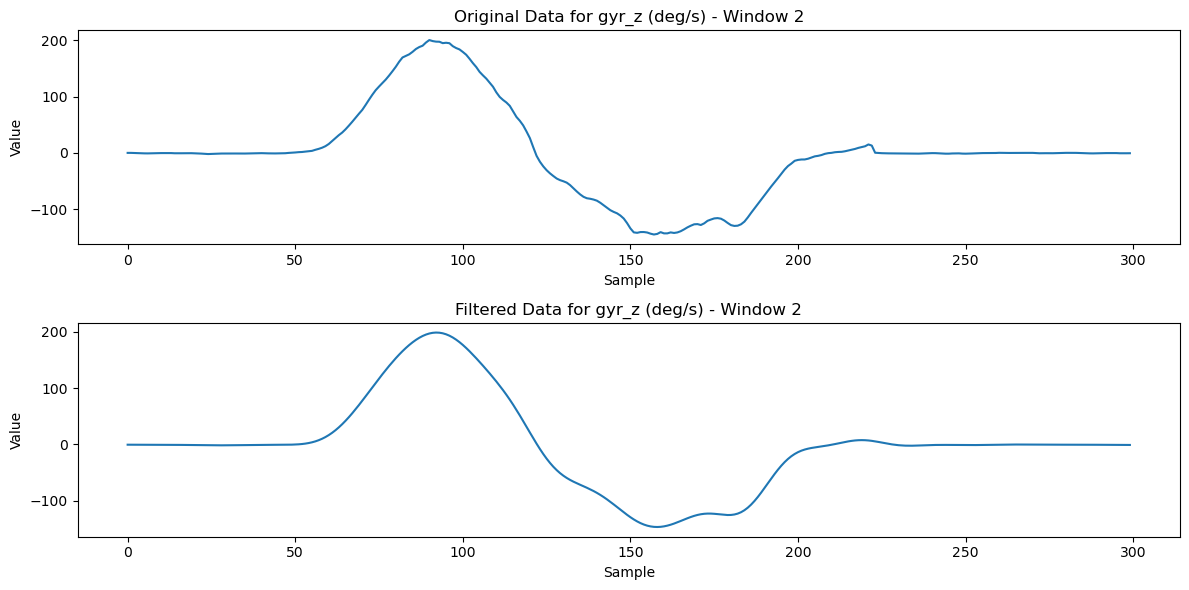

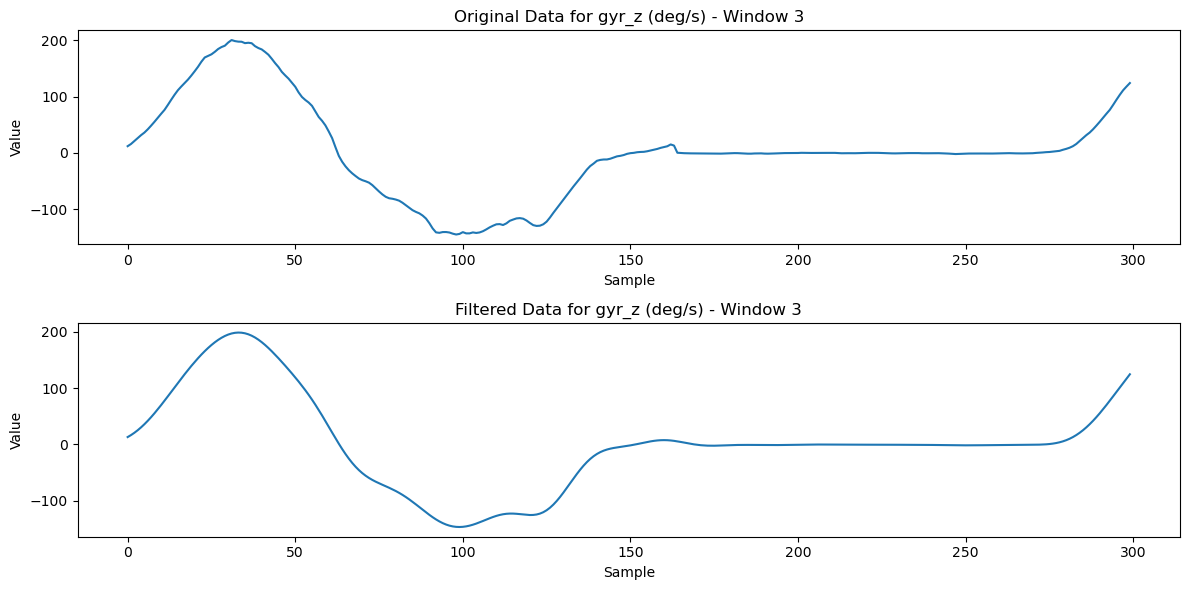

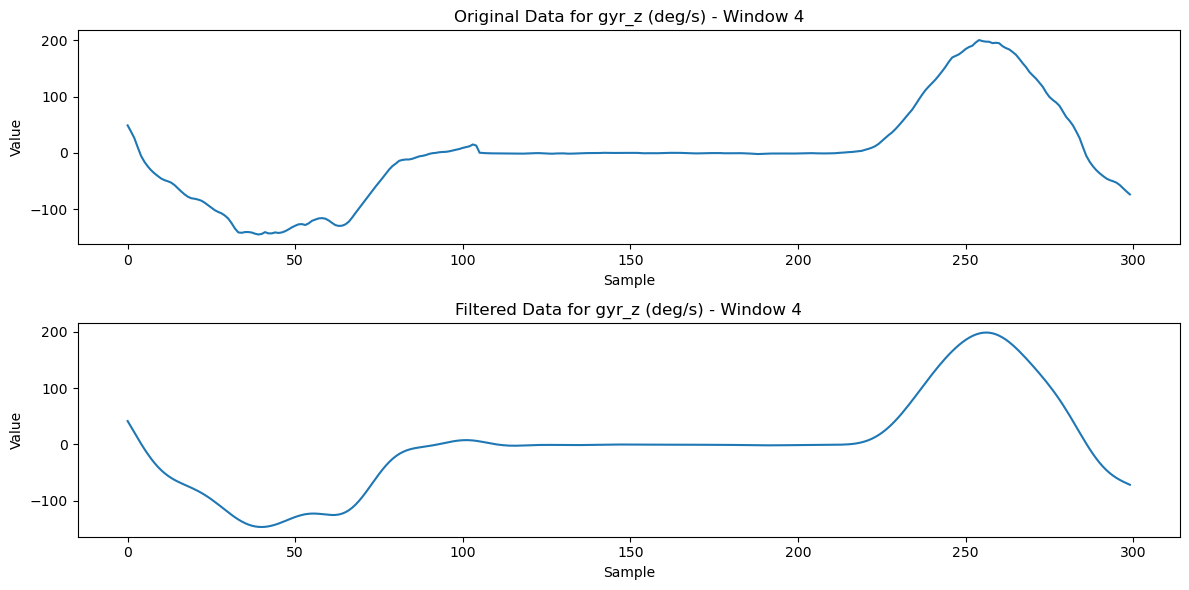

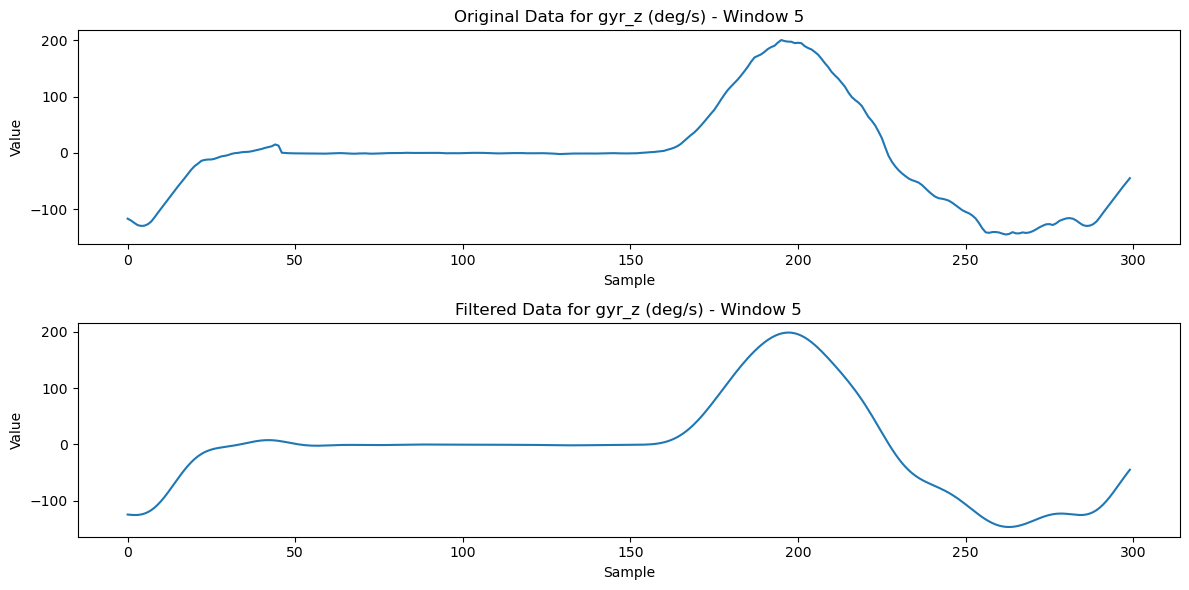

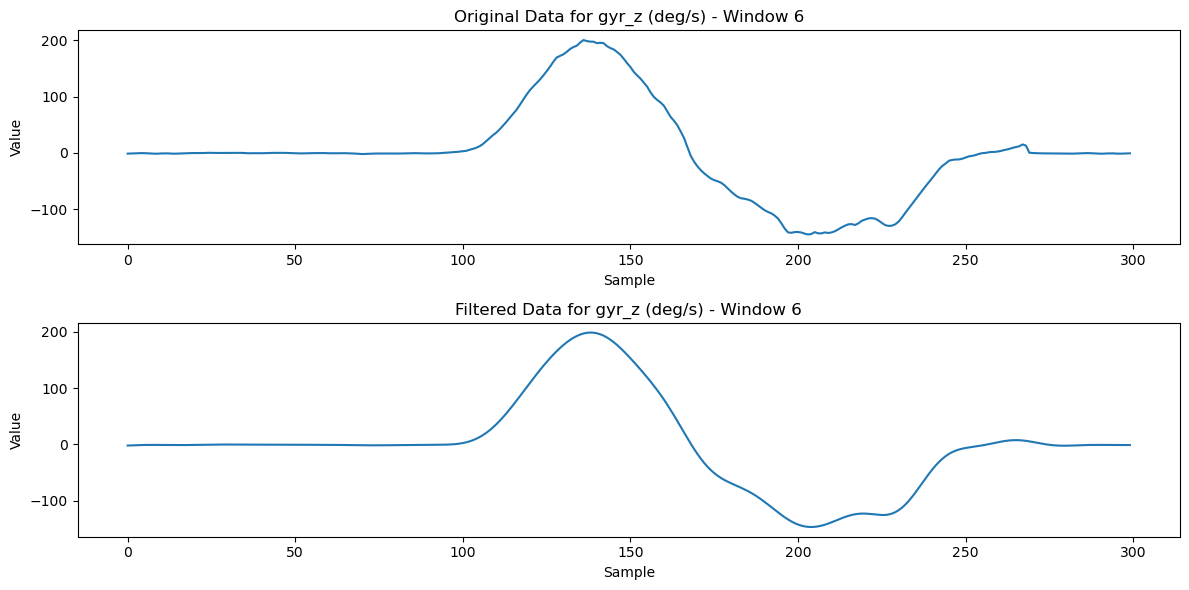

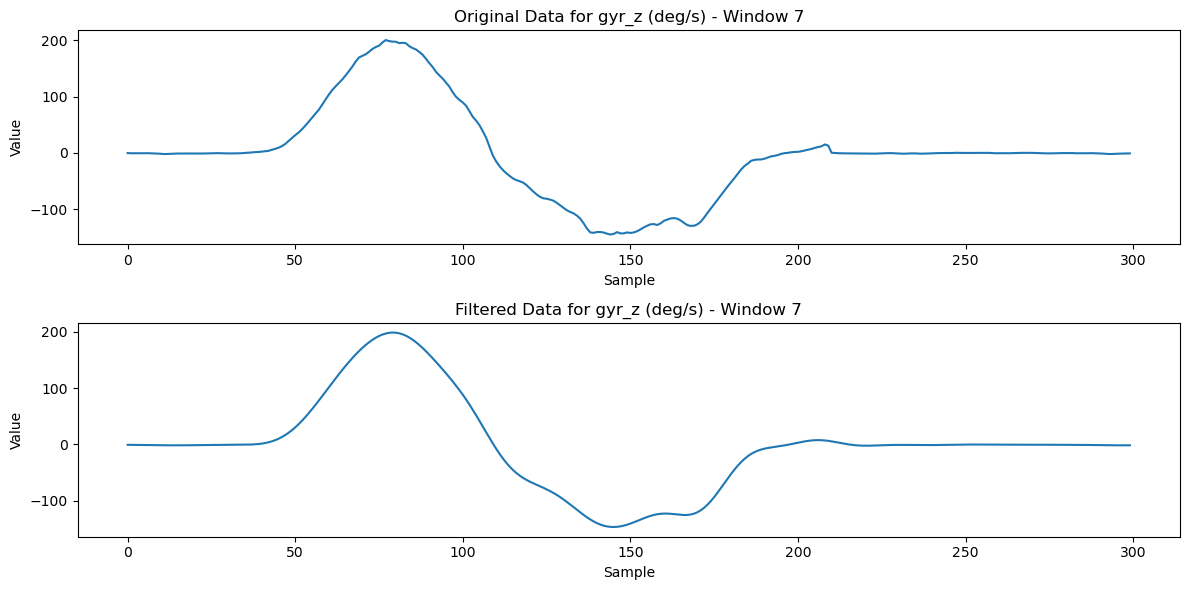

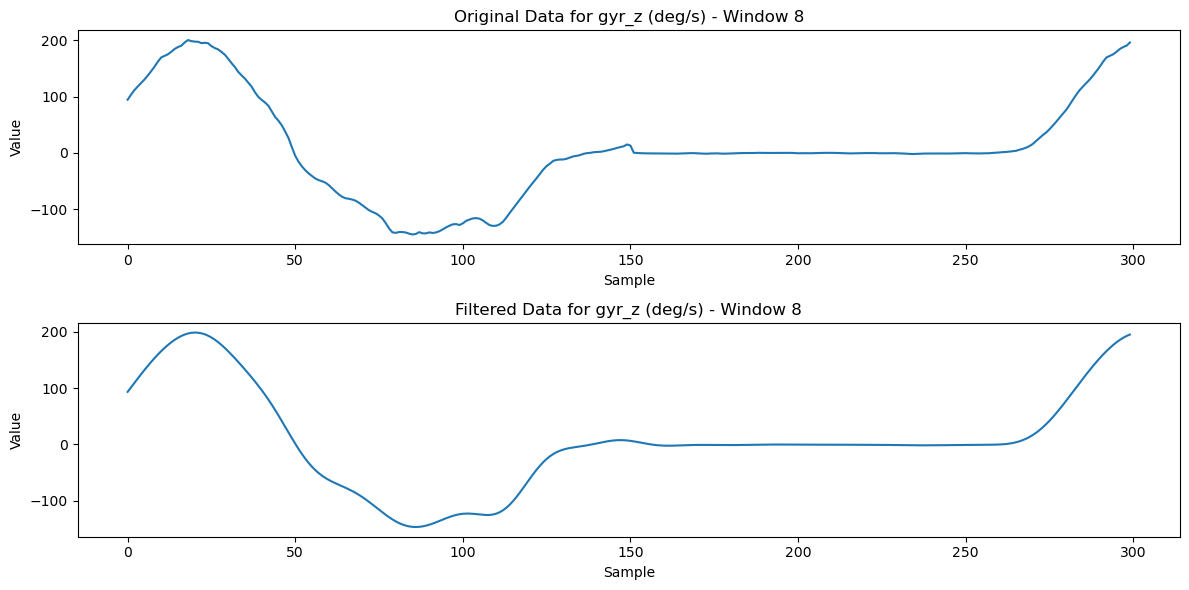

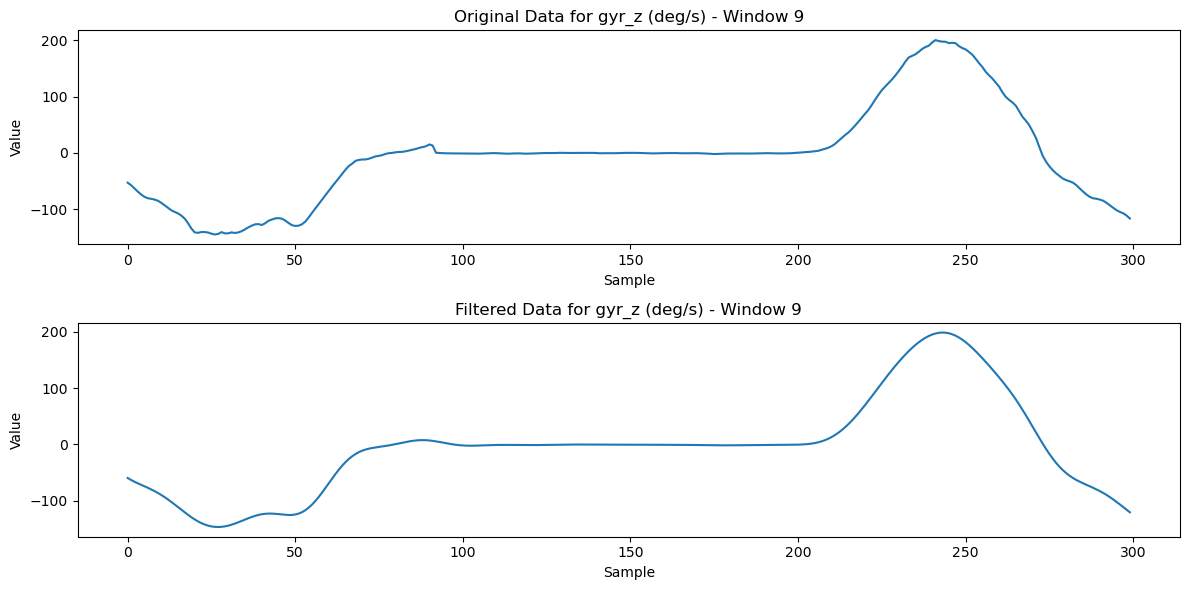

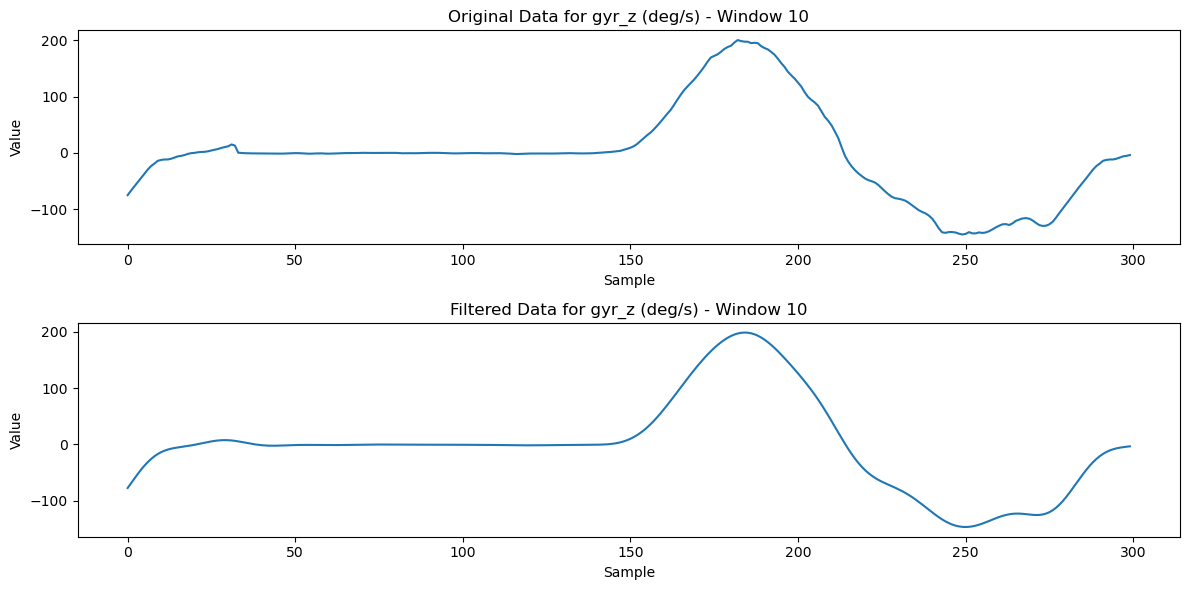

Column: acc_x (g), Windows shape: (8, 300)
Column: acc_y (g), Windows shape: (8, 300)
Column: acc_z (g), Windows shape: (8, 300)
Column: gyr_x (deg/s), Windows shape: (8, 300)
Column: gyr_y (deg/s), Windows shape: (8, 300)
Column: gyr_z (deg/s), Windows shape: (8, 300)


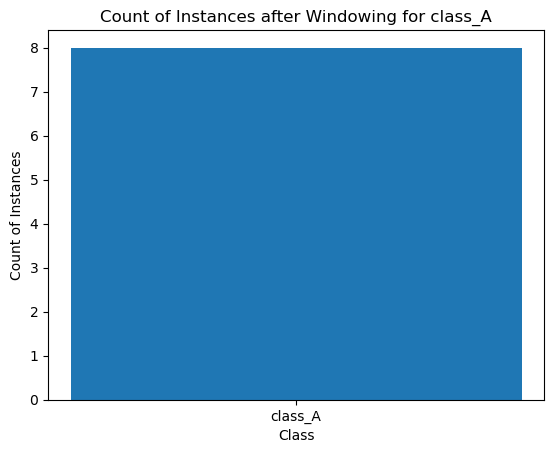

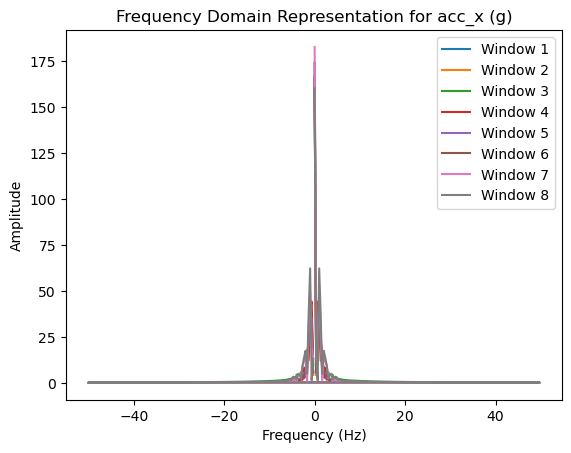

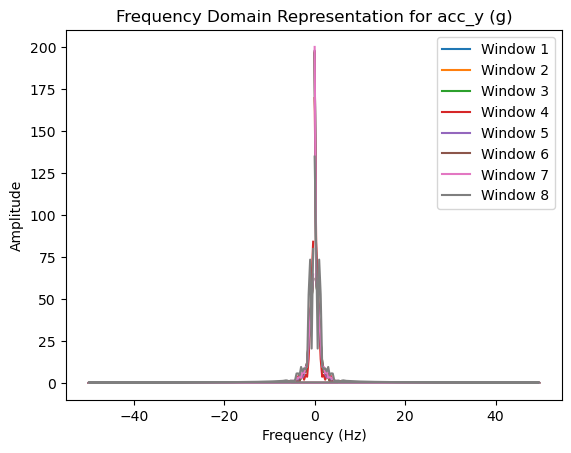

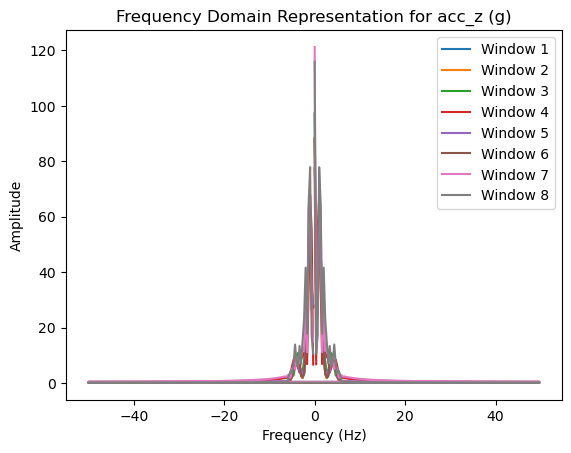

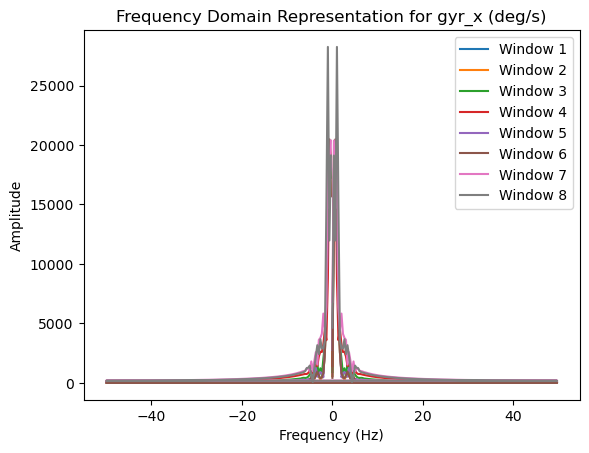

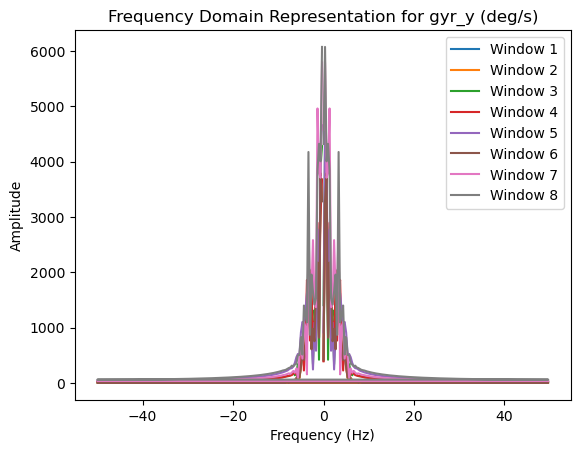

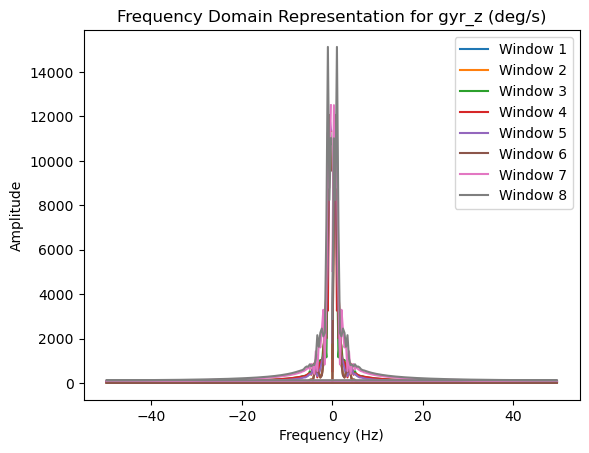

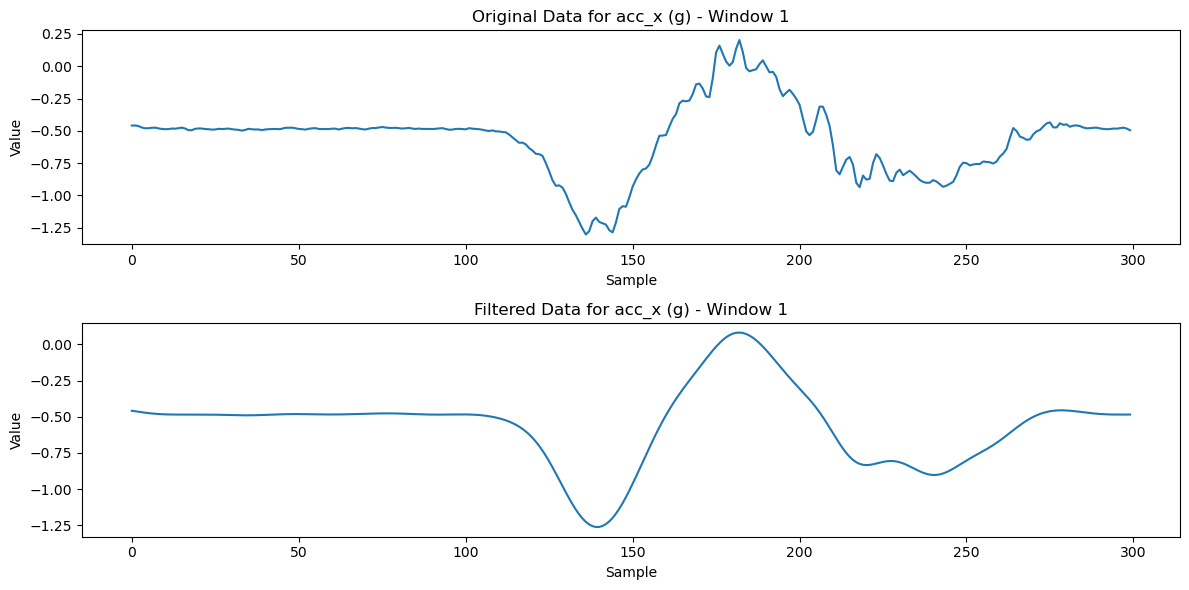

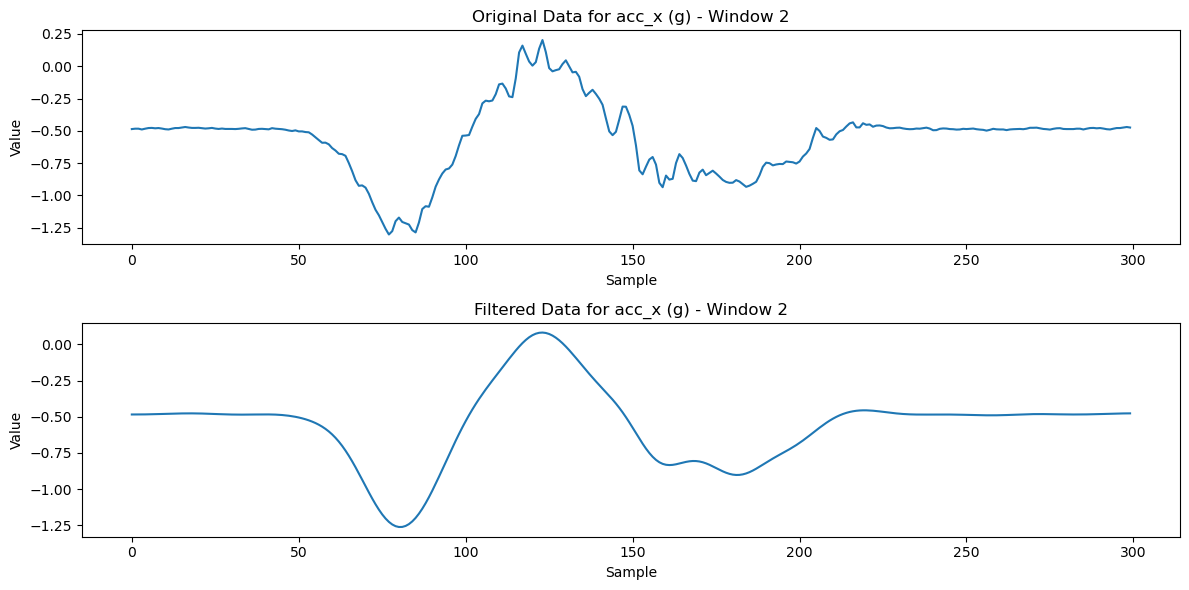

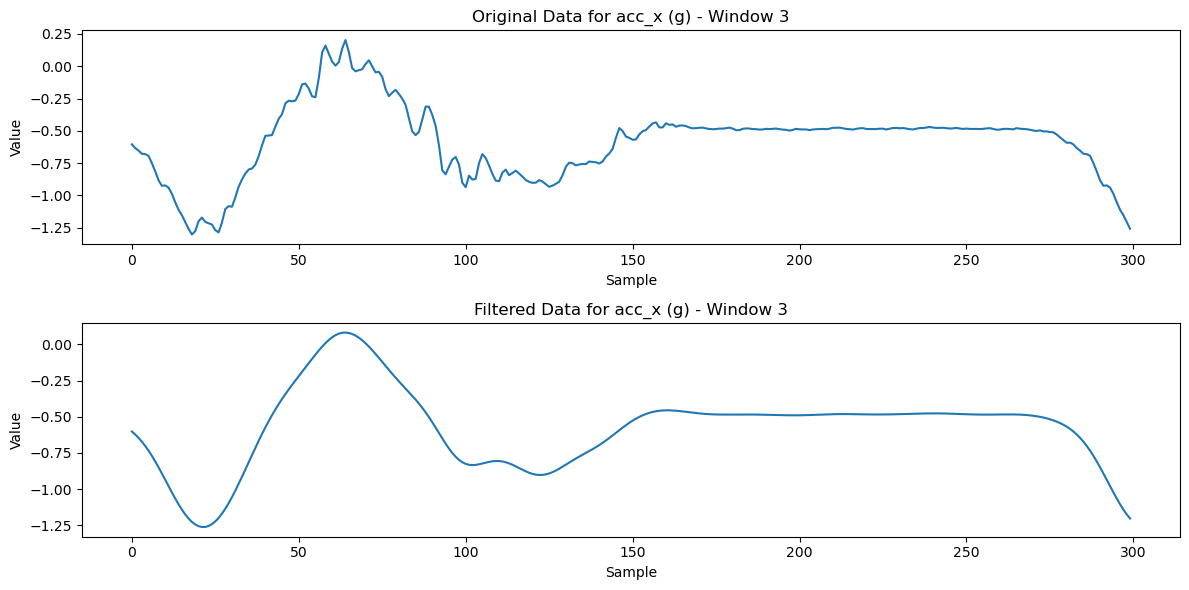

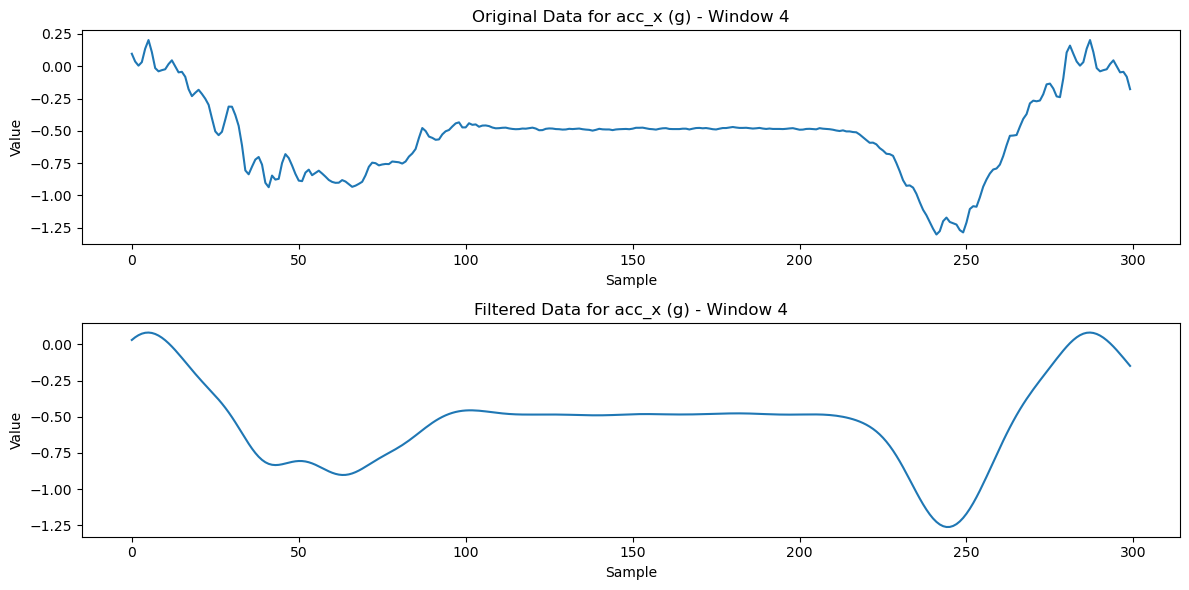

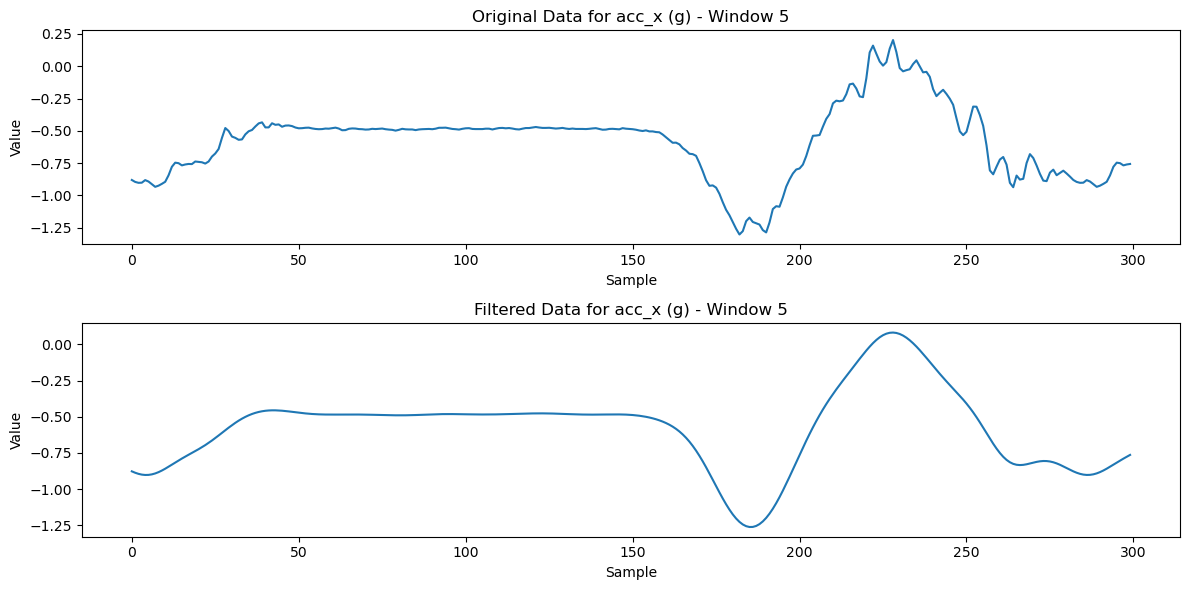

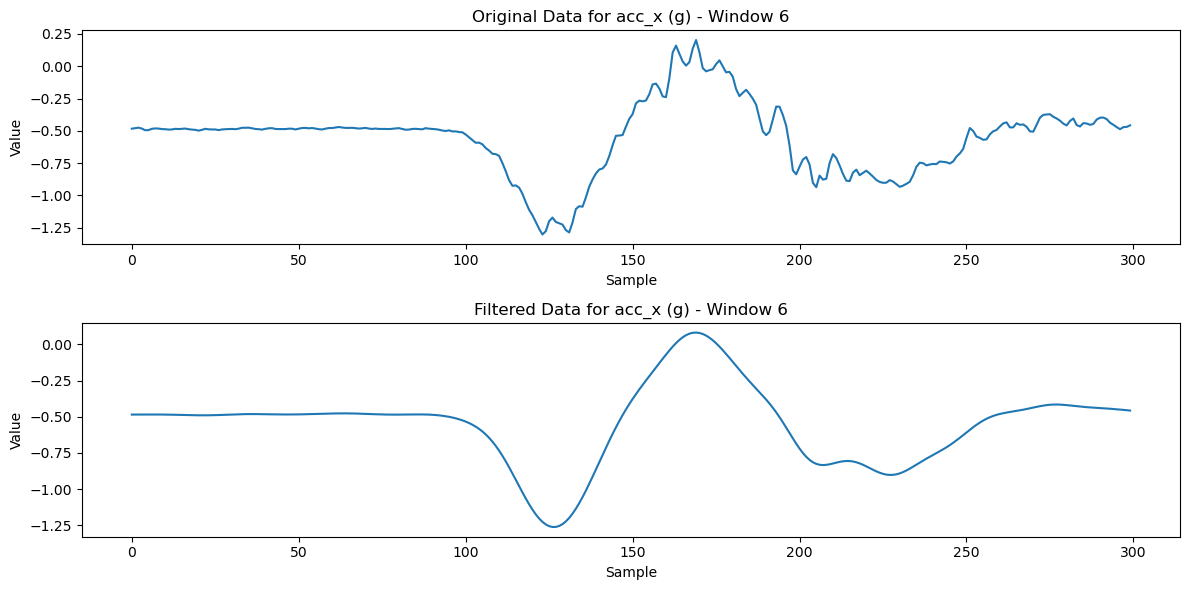

KeyboardInterrupt: 

In [8]:
# Process each file in each class folder
for class_folder in classes_folders_list:
    folder_path = os.path.join(data_path, class_folder)
    files_in_folder = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    for file_name in files_in_folder:
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        # Step 1: Barplot of Time-Length of Collected Instances
        # elapsed_time = df['elapsed (s)'].iloc[-1]

        # # Plotting the barplot
        # plt.bar([class_folder], [elapsed_time])
        # plt.xlabel('Class')
        # plt.ylabel('Total Time Length (s)')
        # plt.title(f'Time-Length of Collected Instances for {class_folder}')
        # plt.show()

        # Apply the sliding window function to each column
        windowed_data = {}
        for col in columns:
            windowed_data[col] = sliding_window_pd(df[col].values, ws=window_size, overlap=overlap, w_type=None, w_center=True, print_stats=True)

        # windowed_data now contains the windowed data for each specified column
        for col, windows in windowed_data.items():
            print(f"Column: {col}, Windows shape: {windows.shape}")

        # Step 3: Barplot of Count of Instances after Windowing
        window_count = len(windows)

        # Plotting the barplot
        plt.bar([class_folder], [window_count])
        plt.xlabel('Class')
        plt.ylabel('Count of Instances')
        plt.title(f'Count of Instances after Windowing for {file_name}')
        plt.show()

        # Step 4: Filter Data and Split into Windows for Each Column
        filtered_windowed_data = {}
        for col in columns:
            sample_data = df[col].values
            filtered_data = apply_filter(sample_data, order=5, wn=0.1, filter_type='lowpass')
            filtered_windowed_data[col] = sliding_window_pd(filtered_data, ws=window_size, overlap=overlap, w_type=None, w_center=True, print_stats=True)

        # Step 5: Transform Data into Frequency Domain
        for col, windows in filtered_windowed_data.items():
            for i, window in enumerate(windows):
                xf, yf = transform_to_frequency_domain(window, sampling_rate)
                plt.plot(xf, yf, label=f'Window {i+1}')
            plt.xlabel('Frequency (Hz)')
            plt.ylabel('Amplitude')
            plt.title(f'Frequency Domain Representation for {col}')
            plt.legend()
            plt.show()

        # Step 6: Plot Original and Filtered Data for Each Window
        for col in columns:
            for i in range(len(filtered_windowed_data[col])):
                plt.figure(figsize=(12, 6))

                # Original data
                plt.subplot(2, 1, 1)
                plt.plot(windowed_data[col][i])
                plt.title(f'Original Data for {col} - Window {i+1}')
                plt.xlabel('Sample')
                plt.ylabel('Value')

                # Filtered data
                plt.subplot(2, 1, 2)
                plt.plot(filtered_windowed_data[col][i])
                plt.title(f'Filtered Data for {col} - Window {i+1}')
                plt.xlabel('Sample')
                plt.ylabel('Value')

                plt.tight_layout()
                plt.show()